In [ ]:
#all of this cell can be removed

cat_path = '/content/drive/MyDrive/semantic-segmentation-master/categories.txt'   
    
with open(cat_path) as fp:
        
    categories = []
    for line in fp:
        _, docs = line.strip().split('\t')
        docs = docs.strip().split(' ')
        categories.append(docs)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
categories

[['1953_L_1',
  '1973_S_68',
  '1978_M_13',
  '1994_M_69',
  '1996_B_72',
  '2008_S_549',
  '2008_S_1411',
  '2011_S_308',
  '2014_J_33',
  '2015_S_368'],
 ['1953_S_23',
  '2007_B_76',
  '1995_S_317',
  '2000_C_151',
  '1976_T_9',
  '1987_M_123',
  '2007_S_632',
  '2004_C_129',
  '2008_C_166'],
 ['1971_S_1',
  '2005_S_388',
  '2006_A_36',
  '2008_I_54',
  '2010_S_431',
  '2011_I_16',
  '2012_S_270',
  '2014_R_41',
  '1963_S_59',
  '1987_C_108',
  '2001_S_1131',
  '2006_A_136',
  '2007_S_608',
  '2007_U_18',
  '2009_S_146',
  '2015_J_10'],
 ['1996_T_169',
  '2007_C_121',
  '2008_P_8',
  '2009_B_16',
  '2010_J_55',
  '2001_A_234',
  '2008_A_260'],
 ['1954_M_25',
  '1977_P_19',
  '1987_S_26',
  '1989_A_55',
  '1994_S_246',
  '2000_V_80',
  '2004_I_24',
  '1980_W_3']]

In [ ]:
dataset_size = 50
num_folds = 5
categories.sort(key = lambda x: len(x))
n_docs = len(sum(categories, []))
assert n_docs == dataset_size, "invalid category list"
           
docs_per_fold = dataset_size // num_folds   
folds = [[] for f in range(docs_per_fold)]

In [ ]:
categories
#n_docs
#docs_per_fold

[['1996_T_169',
  '2007_C_121',
  '2008_P_8',
  '2009_B_16',
  '2010_J_55',
  '2001_A_234',
  '2008_A_260'],
 ['1954_M_25',
  '1977_P_19',
  '1987_S_26',
  '1989_A_55',
  '1994_S_246',
  '2000_V_80',
  '2004_I_24',
  '1980_W_3'],
 ['1953_S_23',
  '2007_B_76',
  '1995_S_317',
  '2000_C_151',
  '1976_T_9',
  '1987_M_123',
  '2007_S_632',
  '2004_C_129',
  '2008_C_166'],
 ['1953_L_1',
  '1973_S_68',
  '1978_M_13',
  '1994_M_69',
  '1996_B_72',
  '2008_S_549',
  '2008_S_1411',
  '2011_S_308',
  '2014_J_33',
  '2015_S_368'],
 ['1971_S_1',
  '2005_S_388',
  '2006_A_36',
  '2008_I_54',
  '2010_S_431',
  '2011_I_16',
  '2012_S_270',
  '2014_R_41',
  '1963_S_59',
  '1987_C_108',
  '2001_S_1131',
  '2006_A_136',
  '2007_S_608',
  '2007_U_18',
  '2009_S_146',
  '2015_J_10']]

In [ ]:



f = 0
for cat in categories:      #remove this for loop
    #print("cat:   ",cat)
    for doc in cat:         #cat = list of new doc names, where each doc name is a doc having one sentence of each label
        #print("doc:   ",doc)
        folds[f].append(doc)
        f = (f + 1) % 5
        #print(f)

# list[num_folds, docs_per_fold] --> list[num_folds * docs_per_fold]
idx_order = sum(folds, [])

In [ ]:
folds

[['1996_T_169',
  '2001_A_234',
  '1989_A_55',
  '1953_S_23',
  '1987_M_123',
  '1973_S_68',
  '2008_S_1411',
  '2005_S_388',
  '2012_S_270',
  '2006_A_136',
  '1996_T_169',
  '2001_A_234',
  '1989_A_55',
  '1953_S_23',
  '1987_M_123',
  '1973_S_68',
  '2008_S_1411',
  '2005_S_388',
  '2012_S_270',
  '2006_A_136'],
 ['2007_C_121',
  '2008_A_260',
  '1994_S_246',
  '2007_B_76',
  '2007_S_632',
  '1978_M_13',
  '2011_S_308',
  '2006_A_36',
  '2014_R_41',
  '2007_S_608',
  '2007_C_121',
  '2008_A_260',
  '1994_S_246',
  '2007_B_76',
  '2007_S_632',
  '1978_M_13',
  '2011_S_308',
  '2006_A_36',
  '2014_R_41',
  '2007_S_608'],
 ['2008_P_8',
  '1954_M_25',
  '2000_V_80',
  '1995_S_317',
  '2004_C_129',
  '1994_M_69',
  '2014_J_33',
  '2008_I_54',
  '1963_S_59',
  '2007_U_18',
  '2008_P_8',
  '1954_M_25',
  '2000_V_80',
  '1995_S_317',
  '2004_C_129',
  '1994_M_69',
  '2014_J_33',
  '2008_I_54',
  '1963_S_59',
  '2007_U_18'],
 ['2009_B_16',
  '1977_P_19',
  '2004_I_24',
  '2000_C_151',
  '200

In [ ]:
idx_order

['1996_T_169',
 '2001_A_234',
 '1989_A_55',
 '1953_S_23',
 '1987_M_123',
 '1973_S_68',
 '2008_S_1411',
 '2005_S_388',
 '2012_S_270',
 '2006_A_136',
 '1996_T_169',
 '2001_A_234',
 '1989_A_55',
 '1953_S_23',
 '1987_M_123',
 '1973_S_68',
 '2008_S_1411',
 '2005_S_388',
 '2012_S_270',
 '2006_A_136',
 '2007_C_121',
 '2008_A_260',
 '1994_S_246',
 '2007_B_76',
 '2007_S_632',
 '1978_M_13',
 '2011_S_308',
 '2006_A_36',
 '2014_R_41',
 '2007_S_608',
 '2007_C_121',
 '2008_A_260',
 '1994_S_246',
 '2007_B_76',
 '2007_S_632',
 '1978_M_13',
 '2011_S_308',
 '2006_A_36',
 '2014_R_41',
 '2007_S_608',
 '2008_P_8',
 '1954_M_25',
 '2000_V_80',
 '1995_S_317',
 '2004_C_129',
 '1994_M_69',
 '2014_J_33',
 '2008_I_54',
 '1963_S_59',
 '2007_U_18',
 '2008_P_8',
 '1954_M_25',
 '2000_V_80',
 '1995_S_317',
 '2004_C_129',
 '1994_M_69',
 '2014_J_33',
 '2008_I_54',
 '1963_S_59',
 '2007_U_18',
 '2009_B_16',
 '1977_P_19',
 '2004_I_24',
 '2000_C_151',
 '2008_C_166',
 '1996_B_72',
 '2015_S_368',
 '2010_S_431',
 '1987_C_108',

In [ ]:
#importing as pandas is way easier than file handling

# Import Module
import os
import pandas as pd

# Folder Path

#path = "/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/"
path = "/content/drive/MyDrive/semantic-segmentation-master/data/text/"
  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
#def read_text_file(file_path, dataf):
#    data1 = pd.read_csv(file_path, sep = "\t", header=None)
#    data1.columns = ["sentence", "label"]
#    dataf = dataf.append(data1)
  
  
df_pretrained = pd.DataFrame()

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}{file}"
  
        # call read text file function
        data1 = pd.read_csv(file_path, sep = "\t", header=None)
        data1.columns = ["sentence", "label"]
        df_pretrained = df_pretrained.append(data1)


#this df is in format apt for ConWea
df_pretrained = df_pretrained.reset_index()

In [ ]:
df_pretrained = df_pretrained.drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df_pretrained

,sentence,label
0,This appeal is preferred against the judgment ...,Facts
1,"Briefly stated, case of the prosecution is tha...",Facts
2,"At that time, Jage Ram (A-1) and his sons Rajb...",Facts
3,"Raju (A-2), Rakesh (A-3) and Madan (A-4) armed...",Facts
4,Wordy altercations ensued between the parties ...,Facts
...,...,...
9375,"The judgment of the High Court,therefore,canno...",Ruling by Present Court
9376,It is set aside accordingly and the order of d...,Ruling by Present Court
9377,The appeal is allowed,Ruling by Present Court
9378,No costs,Ruling by Present Court


In [ ]:
dfFacts = df_pretrained[(df_pretrained["label"] == "Ratio of the decision")]

In [ ]:
dfFacts["sentence"][0:1]

59    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
Name: sentence, dtype: object

In [ ]:
labels = ["Statute","Ratio of the decision","Ruling by Present Court","Precedent","Argument","Ruling by Lower Court","Facts"]
dict = {}

# find minima label in terms of no. of data points
mini = []
for i in range(len(labels)):
  dfFacts = df_pretrained[(df_pretrained["label"] == labels[i])]
  mini.append(len(dfFacts))




In [ ]:
#labels = ["Statute","Ratio of the decision","Ruling by Present Court","Precedent","Argument","Ruling by Lower Court","Facts"]
#mini = [646, 3624, 262, 1468, 845, 316, 2219]
mini

[646, 3624, 262, 1468, 845, 316, 2219]

In [ ]:
import numpy as np

#currently considering stacking only consecutive entries, can make option of shuffling the choices too later 

#creating training and val data

for i in range(min(mini)-40):       #-40 is arbitrary, to ensure that there are 40 
  #dict[i] = []
  dict = pd.DataFrame(columns=['sentence','label'])
  for j in range(len(labels)):
    dict = dict.append(df_pretrained[(df_pretrained["label"] == labels[j])][i:i+1])



  dict1.to_csv('/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit/test{index}.txt'.format(index = i), sep='\t', index=False, header=False )


In [ ]:
(df_pretrained[(df_pretrained["label"] == labels[0])][1:2])['sentence'].item()

'0.043277 0.0083398 -0.024332 -0.62086 -0.063918 -0.19428 0.18263 -0.24503 0.33515 0.26161 0.065628 0.076383 0.42822 0.19241 -0.037241 0.073454 -0.25874 0.061477 0.21256 -0.12858 0.65755 0.7146 0.21376 0.26502 0.18157 -0.17343 0.44954 0.080281 -0.20733 0.86308 -0.064851 -0.50758 0.037954 0.05742 -0.45559 0.14551 0.22999 -0.29755 0.1821 0.61315 0.054061 0.025293 1.3595 -0.24664 0.94434 -0.71208 0.070614 0.54731 -0.094254 0.01872 -0.66614 0.036448 -0.39488 0.10646 -0.3257 -0.079157 0.15228 -0.27849 -0.070351 1.152 1.0007 0.26311 -0.094989 0.49812 -0.2721 0.35994 0.051266 -0.12839 0.045927 -0.79231 -0.86982 -0.56924 0.34916 -0.41091 -0.79086 0.58693 -0.0033543 -0.44714 0.36831 0.29241 0.33058 -0.99635 -0.27449 0.3447 0.084496 -0.18515 -0.0024173 0.26945 0.23699 -0.31065 0.20679 -0.43096 0.93727 0.002124 0.70534 0.3111 -0.24613 0.68742 0.12235 -0.098037 0.37894 -0.21423 0.46186 -0.59183 0.27541 0.045219 0.20612 0.19318 0.31389 0.24417 0.14699 -0.70322 -0.43923 -0.25146 -0.26453 0.08062 -0.

In [ ]:
dic = []
for i in range(min(mini)-40):
  dic = []
  for j in range(len(labels)):
    dic.append((df_pretrained[(df_pretrained["label"] == labels[j])][i:i+1])['sentence'].item())
    dic.append('\t')
    dic.append(labels[j])
    dic.append('\n')
  dic1 = ''.join([elem for elem in dic])
  with open("/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit1/train{index}.txt".format(index=i), "w") as text_file:
    text_file.write(dic1)




In [ ]:
#appending 5 sentences of every label in each of new doc
num = 5 #number of sentences for each label
dic = []
for i in range(min(mini)-40):
  if i%num == 0:    #bc of this few sentences will not be in both test and train.. 
    dic = []
    #k = 0
    for k in range(5):
      for j in range(len(labels)):
        #l = i-k
        dic.append((df_pretrained[(df_pretrained["label"] == labels[j])][i+k:i+k+1])['sentence'].item())
        dic.append('\t')
        dic.append(labels[j])
        dic.append('\n')
        #k+=1

    list = np.array(range(5*len(labels))) 
    np.random.shuffle(list)
    list = list.tolist()    
    dic2 = []

    for m in range(5*len(labels)):
      dic2.append(dic[4*list[m]])
      dic2.append(dic[4*list[m]+1])
      dic2.append(dic[4*list[m]+2])
      dic2.append(dic[4*list[m]+3])

    dic1 = ''.join([elem for elem in dic2])

      #random shuffle indices
#    list = np.array(1:len(dict))
 #   randlist = np.random.shuffle(list)
  #  randlist = randlist.tolist()
   # dict1 = pd.DataFrame(columns=['sentence','label'])
    #for k in range(len(dict)):
     # dict1.append(dict.iloc[randlist[k]])

#before executin, create a new folder to save data

    with open("/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random/train{index}.txt".format(index=i), "w") as text_file:
      text_file.write(dic1)


In [ ]:
import numpy as np
np.array(range(7))

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
dict[0][1]["label"].item()

'Ratio of the decision'

In [ ]:
# empty dataframe
dff =  pd.DataFrame(columns=['sentence','label'])

In [ ]:
dff.append(df_pretrained[0:2])

,sentence,label
0,0.41786 0.36244 -0.17586 0.024889 0.93882 -0.8...,Facts
1,0.89953 -0.20147 -0.74247 0.27504 1.0026 -0.34...,Facts


In [ ]:
#create test data

#dict_test = {}

for i in range(len(labels)):
  dfFacts = df_pretrained[(df_pretrained["label"] == labels[i])]
  dff = dff.append(dfFacts[min(mini)-40:])



In [ ]:
#save test data as tsv

dff.to_csv('/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/testsplit/test5sent_text_annot.txt', sep='\t', index=False, header=False )

In [ ]:
#create test data 5sent .. unannotated

l = min(mini)-40
while l%num != 0:
  l-=1

# empty dataframe
dff =  pd.DataFrame(columns=['sentence','label'])

#dict_test = {}

for i in range(len(labels)):
  dfFacts = df_pretrained[(df_pretrained["label"] == labels[i])]
  dff = dff.append(dfFacts[l:])

test = []
for j in range(len(dff)):
  test.append(dff[j:(j+1)]['sentence'].item())
  test.append('\n')

test1 = ''.join([elem for elem in test])
with open("/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/testsplit/test5sent_text_unannot.txt", "w") as text_file:
  text_file.write(test1)


#dff.to_csv('/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/testsplit/test5sent.txt', sep='\t', index=False, header=False )

#dic = []
#for i in range(min(mini)-40):
 # dic = []
  #for j in range(len(labels)):
   # dic.append((df_pretrained[(df_pretrained["label"] == labels[j])][i:i+1])['sentence'].item())
    #dic.append('\t')
    #dic.append(labels[j])
    #dic.append('\n')
  #dic1 = ''.join([elem for elem in dic])
  #with open("/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit1/train{index}.txt".format(index=i), "w") as text_file:
   # text_file.write(dic1)



In [ ]:
dff[1:2]['sentence'].item()

'0.25764 -0.35178 -0.022154 -0.21764 0.19729 -0.096199 -0.46972 -0.37394 0.38676 0.55678 -0.11425 -0.17293 -0.079536 -0.22609 -0.065918 0.17426 0.28226 -0.06858 -0.39316 0.073878 0.15044 0.056788 -0.12325 -0.27455 0.0595 -0.071096 0.64716 -0.30705 -0.19932 0.079688 0.16084 -0.11284 -0.27718 0.11178 -0.28646 -0.23691 0.01016 0.015968 0.062572 0.27018 -0.35104 0.080493 0.31564 0.097222 0.33689 -0.32462 0.27708 0.32147 0.051895 0.15364 -0.38074 0.26155 0.0014474 0.24518 -0.43912 -0.012771 -0.096995 -0.28771 -0.32432 0.2733 0.51535 0.34644 0.16482 0.41637 -0.23501 0.10386 0.25052 -0.23316 0.091095 -0.36308 0.19402 -0.099606 0.17472 -0.364 -0.68291 0.10119 0.15732 -0.007575 0.25295 -0.12059 0.0031372 0.026838 -0.22221 -0.071353 0.023656 -0.13235 0.0090256 0.25556 -0.17378 -0.1298 0.13366 -0.12276 0.53976 -0.31985 -0.0057376 -0.11438 -0.36289 0.24919 0.030052 0.052224 0.13907 0.39178 0.19751 -0.055832 0.0082612 0.24004 -0.038015 0.13179 0.20431 0.062493 -0.17793 0.12249 -0.25416 0.16797 0.10

In [ ]:
df_pretrained[(df_pretrained["label"] == labels[0])]['sentence']

65      0.07745 -0.23992 -0.51482 0.044463 0.40665 0.0...
66      0.043277 0.0083398 -0.024332 -0.62086 -0.06391...
67      0.606 -0.092397 0.013228 -0.24715 0.47442 -0.0...
68      0.40104 0.14643 -0.44702 -0.035168 0.57179 -0....
69      0.30543 -0.35756 -0.16905 -0.087712 0.23079 -0...
                              ...                        
8333    0.0016475 0.18151 -0.26187 -0.096602 0.6007 -0...
9018    0.45357 -0.2354 0.20648 -0.3743 0.35817 -0.067...
9019    0.033891 0.10241 0.35322 -0.25937 0.32944 -0.1...
9175    0.20315 -0.17655 -0.27844 -0.093366 0.43441 -0...
9187    0.34472 -0.12758 -0.063456 -0.20467 0.44792 -0...
Name: sentence, Length: 646, dtype: object

In [ ]:
#dfff = pd.read_csv('/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/testsplit/test.csv', delimiter='\t')
#/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/testsplit/test.csv

In [ ]:
dff

,sentence,label
2464,0.35246 -0.27577 0.012507 -0.073196 0.33184 -0...,Statute
2465,0.169 0.32039 -0.31838 -0.1208 0.33545 -0.3528...,Statute
2466,0.53348 -0.01463 -0.19736 -0.33558 0.392 -0.15...,Statute
2467,0.21859 -0.26358 -0.37209 0.00063044 0.47764 -...,Statute
2544,0.16772 -0.17037 -0.29152 -0.080267 0.55484 -0...,Statute
...,...,...
9330,-0.23063 0.36192 0.14041 -0.11192 0.27426 -0.0...,Facts
9347,0.20408 -0.2073 -0.041132 -0.5288 0.49862 -0.2...,Facts
9348,0.023111 0.0074136 -0.038345 -0.015014 -0.0012...,Facts
9349,0.095305 0.069985 -0.1562 0.36307 0.28045 0.01...,Facts


In [ ]:
ll = []
ll.append('docnames')
ll.append('\t')
#ll=ll.append('\t')
for i in range(min(mini)-40):
  if i!=min(mini)-41:
    stri = 'train{index} '.format(index=i)
    ll.append(stri)
  else:
    stri = 'train{index}'.format(index=i)
    ll.append(stri)    

ll.append('\n')


In [ ]:
lll = ''.join([elem for elem in ll])

In [ ]:
#category txt for 5sent
num = 5 #number of sentences for each label
ll = []
ll.append('docnames')
ll.append('\t')
#ll=ll.append('\t')

l = min(mini)-40
while l%num != 0:
  l-=1

doccount = 0

for i in range(min(mini)-40):
  if i%num == 0:
    if i!=l:
      stri = 'train{index} '.format(index=i)
      ll.append(stri)
    else:
      stri = 'train{index}'.format(index=i)
      ll.append(stri)   
    doccount+=1 

ll.append('\n')

lll = ''.join([elem for elem in ll])

In [ ]:
lll

'docnames\ttrain0 train5 train10 train15 train20 train25 train30 train35 train40 train45 train50 train55 train60 train65 train70 train75 train80 train85 train90 train95 train100 train105 train110 train115 train120 train125 train130 train135 train140 train145 train150 train155 train160 train165 train170 train175 train180 train185 train190 train195 train200 train205 train210 train215 train220\n'

In [ ]:
doccount

45

In [ ]:
with open("/content/drive/MyDrive/semantic-segmentation-master/categories5sent.txt", "w") as text_file:
    text_file.write(lll)

Model Run

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent.txt' --dataset_size 45 --num_folds 5


Preparing data ... Done
Vocabulary size: 4119
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     649.787   0.656     572.863   0.354
     20     159.589   0.907     839.899   0.406
     30      73.246   0.963     874.250   0.462
     40      30.856   0.983    1004.874   0.423
     50      29.617   0.986    1023.039   0.416
     60      23.042   0.987    1003.929   0.427
     70      21.110   0.991    1048.087   0.449
     80      13.234   0.994    1173.191   0.406
     90      14.654   0.991    1117.515   0.448
    100      12.765   0.995    1093.073   0.446
    110      19.418   0.990    1113.729   0.454
    120      13.130   0.993    1142.173   0.391
    130      11.166   0.996    1183.343   0.430
    140       9.937   0.994    1145.953   0.443
    150      10.770   0.996    1080.923   0.437
    160       5.721   0.997    1164.524  

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit1/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories.txt' --dataset_size 222 --num_folds 20


Preparing data ... Traceback (most recent call last):
  File "/content/drive/MyDrive/semantic-segmentation-master/run.py", line 65, in <module>
    main()
  File "/content/drive/MyDrive/semantic-segmentation-master/run.py", line 31, in main
    x, y, word2idx, tag2idx = prepare_data(idx_order, args)
  File "/content/drive/.shortcut-targets-by-id/1aHs0Z74REYbl2NJOPuHx6W85i5JvwuuP/semantic-segmentation-master/prepare_data.py", line 65, in prepare_data
    for sent in fp:
  File "/usr/lib/python3.7/codecs.py", line 319, in decode
    def decode(self, input, final=False):
KeyboardInterrupt


In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --pretrained True --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories_orig.txt' --num_folds 5


Preparing data ... Done
Vocabulary size: 2
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10    2807.495   0.538    1321.699   0.518
     20    1525.509   0.789    1053.107   0.680
     30    1017.317   0.871     987.934   0.717
     40     688.595   0.925    1010.460   0.722
     50     958.065   0.869     879.322   0.713
     60     584.289   0.926     874.014   0.733
     70     402.931   0.955     943.144   0.738
     80     307.787   0.969    1011.581   0.729
     90     236.188   0.977    1123.408   0.724
    100    2130.713   0.662     875.410   0.676
    110     764.908   0.888     746.167   0.755
    120     470.041   0.947     814.041   0.789
    130     333.840   0.964     875.856   0.767
    140     261.049   0.972     951.075   0.771
    150     184.084   0.981     978.130   0.779
    160     145.672   0.988    1026.955   0.

In [ ]:
#open text file in read mode
text_file = open("/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/1953_L_1.txt", "r")
 
#read whole file to a string
d = text_file.read()

print(d)

#text_file1 = open("/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit/train0.txt", "r")
 
#read whole file to a string
#dd = text_file1.read()

#print(dd)

0.083594 -0.15763 -0.32301 -0.1163 0.36526 0.028769 -0.26186 0.091449 0.59528 0.29706 -0.10711 0.091572 0.065747 0.16876 -0.16542 0.28246 -0.02386 0.042925 -0.18239 -0.11163 0.18193 -0.058599 0.044147 -0.44555 -0.079359 -0.1496 0.3445 -0.22071 0.087644 0.16789 0.30403 0.1197 -0.099299 -0.58227 -0.17709 -0.25406 -0.027986 -0.16944 0.20811 0.0091906 0.026056 0.36621 0.27025 0.20922 0.62341 0.23863 0.38772 0.18275 0.26647 0.26184 0.013374 0.050986 0.17078 0.038539 -0.20466 -0.21785 0.22009 -0.010273 0.0026163 0.2222 0.042593 0.10622 0.2307 0.28477 -0.01643 0.22299 0.019394 0.28395 0.12654 -0.29688 0.51953 0.16357 0.166 -0.091163 0.18443 0.19848 0.27878 0.050295 0.26008 -0.17508 -0.040145 0.21555 -0.14408 0.063845 -0.013606 -0.33593 -0.18467 0.082712 0.31247 0.014769 -0.0063918 -0.09168 0.19565 -0.32429 -0.18978 -0.23395 -0.12112 -0.0064714 0.1539 -0.35643 0.37764 -0.20299 0.20028 0.46368 0.17094 0.73176 -0.60787 0.16927 -0.18635 -0.11966 -0.18384 0.11353 -0.46519 0.073188 0.063272 0.05784

In [ ]:
text_file1 = open("/content/drive/MyDrive/semantic-segmentation-master/categories_orig.txt", "r")
 
#read whole file to a string
dd = text_file1.read()

dd

'Land & Property\t1953_L_1 1973_S_68 1978_M_13 1994_M_69 1996_B_72 2008_S_549 2008_S_1411 2011_S_308 2014_J_33 2015_S_368\nConstitutional\t1953_S_23 2007_B_76 1995_S_317 2000_C_151 1976_T_9 1987_M_123 2007_S_632 2004_C_129 2008_C_166\nCriminal\t1971_S_1 2005_S_388 2006_A_36 2008_I_54 2010_S_431 2011_I_16 2012_S_270 2014_R_41 1963_S_59 1987_C_108 2001_S_1131 2006_A_136 2007_S_608 2007_U_18 2009_S_146 2015_J_10\nIntellectual Property\t1996_T_169 2007_C_121 2008_P_8 2009_B_16 2010_J_55 2001_A_234 2008_A_260\nLabour & Industrial Law\t1954_M_25 1977_P_19 1987_S_26 1989_A_55 1994_S_246 2000_V_80 2004_I_24 1980_W_3\n'

Inference

In [ ]:
!pip install sent2vec

     |████████████████████████████████| 3.5 MB 9.0 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 596 kB 66.9 MB/s 
     |████████████████████████████████| 895 kB 59.4 MB/s 
     |████████████████████████████████| 6.8 MB 53.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-TAR/infer.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/testsplit/data/' --model_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext/model_state4.tar' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext/predictions.txt' --word2idx_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext/word2idx.json' --tag2idx_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext/tag2idx.json'


Preparing data ... Done

Loading model ... Done
/content/drive/MyDrive/semantic-segmentation-TAR/model/Hier_BiLSTM_CRF_tags.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probabilities = sm(scores)
Saving predictions ... Done


To control how much training data is used

In [ ]:
# Import Module
import os
import pandas as pd
import numpy as np

trainnum = 10 #change as per need.. or use a loop to consider a range of values

mydir = "/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim"

filelist = [ f for f in os.listdir(mydir) if f.endswith(".txt") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))

#appending 5 sentences of every label in each of new doc
num = 5 #number of sentences for each label
dic = []
uu = 0
for i in range(min(mini)-40):
  if i%num == 0:    #bc of this few sentences will not be in both test and train.. 
    dic = []
    #k = 0
    for k in range(5):
      for j in range(len(labels)):
        #l = i-k
        dic.append((df_pretrained[(df_pretrained["label"] == labels[j])][i+k:i+k+1])['sentence'].item())
        dic.append('\t')
        dic.append(labels[j])
        dic.append('\n')
        #k+=1

    list = np.array(range(5*len(labels))) 
    np.random.shuffle(list)
    list = list.tolist()    
    dic2 = []

    for m in range(5*len(labels)):
      dic2.append(dic[4*list[m]])
      dic2.append(dic[4*list[m]+1])
      dic2.append(dic[4*list[m]+2])
      dic2.append(dic[4*list[m]+3])

    dic1 = ''.join([elem for elem in dic2])

      #random shuffle indices
#    list = np.array(1:len(dict))
 #   randlist = np.random.shuffle(list)
  #  randlist = randlist.tolist()
   # dict1 = pd.DataFrame(columns=['sentence','label'])
    #for k in range(len(dict)):
     # dict1.append(dict.iloc[randlist[k]])

#before executin, create a new folder to save data

    
    if uu < trainnum:
      try:
        os.mkdir(mydir)
      except OSError as error:
        print(error)

      with open("/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim/train{index}.txt".format(index=i), "w") as text_file:
        text_file.write(dic1)
      uu+=1



[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim'
[Errno 17] File exists: 

In [ ]:
uu

10

In [ ]:

# category list

#category txt for 5sent
num = 5 #number of sentences for each label
ll = []
ll.append('docnames')
ll.append('\t')
#ll=ll.append('\t')

l = min(mini)-40
while l%num != 0:
  l-=1

pp = 0
doccount = 0
lastind = 0
for i in range(min(mini)-40):
  
  if pp < (trainnum -1):
    if i%num == 0:
      if i!=l:
        stri = 'train{index} '.format(index=i)
        ll.append(stri)
        lastind = i
      else:
        stri = 'train{index}'.format(index=i)
        ll.append(stri)   
      doccount+=1
      pp += 1 

ll.append('train{index}'.format(index=(lastind+num)))
ll.append('\n')

lll = ''.join([elem for elem in ll])

In [ ]:
lll

'docnames\ttrain0 train5 train10 train15 train20 train25 train30 train35 train40 train45\n'

In [ ]:
with open("/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim.txt", "w") as text_file:
    text_file.write(lll)

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim.txt' --dataset_size 10 --num_folds 2


Preparing data ... Done
Vocabulary size: 1677
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     120.218   0.768     411.953   0.268
     20      13.557   0.994     651.875   0.260
     30       2.700   0.994     748.325   0.308
     40       0.892   1.000     899.888   0.285
     50       1.239   1.000     813.489   0.291
     60       0.282   1.000     909.987   0.249
     70       4.186   0.994     837.603   0.297
     80       1.106   1.000     870.787   0.252
     90       0.216   1.000     849.124   0.293
    100       0.288   1.000     874.955   0.281
    110       1.094   1.000     859.681   0.279
    120       0.118   1.000     928.371   0.267
    130       0.157   1.000     932.875   0.305
    140       0.236   1.000     998.521   0.255
    150       0.072   1.000     873.352   0.322
    160       0.139   1.000     915.776  

Loop for finding satuaration of training data

In [ ]:
# Import Module
import os
import pandas as pd
import numpy as np

trainnum = np.arange(10,46,5) #change as per need.. or use a loop to consider a range of values

mydir = "/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat"

for tn in trainnum:

  filelist = [ f for f in os.listdir(mydir) if f.endswith(".txt") ]
  for f in filelist:
      os.remove(os.path.join(mydir, f))

#appending 5 sentences of every label in each of new doc
  num = 5 #number of sentences for each label
  dic = []
  uu = 0
  for i in range(min(mini)-40):
    if i%num == 0:    #bc of this few sentences will not be in both test and train.. 
      dic = []
    #k = 0
      for k in range(5):
        for j in range(len(labels)):
        #l = i-k
          dic.append((df_pretrained[(df_pretrained["label"] == labels[j])][i+k:i+k+1])['sentence'].item())
          dic.append('\t')
          dic.append(labels[j])
          dic.append('\n')
        #k+=1

      list = np.array(range(5*len(labels))) 
      np.random.shuffle(list)
      list = list.tolist()    
      dic2 = []

      for m in range(5*len(labels)):
        dic2.append(dic[4*list[m]])
        dic2.append(dic[4*list[m]+1])
        dic2.append(dic[4*list[m]+2])
        dic2.append(dic[4*list[m]+3])

      dic1 = ''.join([elem for elem in dic2])

      #random shuffle indices
#    list = np.array(1:len(dict))
 #   randlist = np.random.shuffle(list)
  #  randlist = randlist.tolist()
   # dict1 = pd.DataFrame(columns=['sentence','label'])
    #for k in range(len(dict)):
     # dict1.append(dict.iloc[randlist[k]])



#empty sub folder before every new execution.. or write a if loop to do it later

    
      if uu < tn:
        try:
          os.mkdir("/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt{ind}".format(ind = tn))
        except OSError as error:
          print(error)

        with open("/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt{ind}/train{index}.txt".format(ind = tn, index=i), "w") as text_file:
          text_file.write(dic1)
        uu+=1


# category list

#category txt for 5sent
  num = 5 #number of sentences for each label
  ll = []
  ll.append('docnames')
  ll.append('\t')
#ll=ll.append('\t')

  l = min(mini)-40
  while l%num != 0:
    l-=1

  pp = 0
  doccount = 0
  lastind = 0
  for i in range(min(mini)-40):
  
    if pp < (tn -1):
      if i%num == 0:
        if i!=l:
          stri = 'train{index} '.format(index=i)
          ll.append(stri)
          lastind = i
        else:
          stri = 'train{index}'.format(index=i)
          ll.append(stri)   
        doccount+=1
        pp += 1 

  ll.append('train{index}'.format(index=(lastind+num)))
  ll.append('\n')

  lll = ''.join([elem for elem in ll])
  with open("/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat_trainamt{indd}.txt".format(indd=tn), "w") as text_file:
    text_file.write(lll)

 # print("************TRAIN SET NUMBER***********  :   ",tn)
 # tnn = 0
 # tnn = int(tn)
 # !python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim_sat/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat.txt' --dataset_size tnn --num_folds 2


[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt10'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt10'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt10'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt10'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt10'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt10'
[Errno 17] File exists: '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt10'
[Errno 17] File exists: '/content/drive/M

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt10/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim_sat/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat_trainamt10.txt' --dataset_size 10 --num_folds 2


Preparing data ... Done
Vocabulary size: 1677
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     125.481   0.748     490.772   0.207
     20      12.571   0.971     630.296   0.282
     30       3.173   0.994     802.076   0.296
     40       3.829   0.994     831.135   0.282
     50       0.458   1.000     904.883   0.292
     60       0.418   1.000     887.397   0.275
     70       0.446   1.000     920.379   0.276
     80       0.412   1.000     915.147   0.272
     90       0.198   1.000     939.519   0.255
    100       0.575   1.000     907.183   0.268
    110       1.199   0.994     917.252   0.287
    120       0.780   0.994     940.550   0.276
    130       0.271   1.000    1020.693   0.302
    140       0.306   1.000     929.842   0.267
    150       0.042   1.000     916.614   0.244
    160       0.330   1.000     922.832  

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt15/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim_sat/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat_trainamt15.txt' --dataset_size 15 --num_folds 2


Preparing data ... Done
Vocabulary size: 2167
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     247.671   0.696     571.602   0.268
     20      24.444   0.971     878.203   0.295
     30       9.127   0.989    1042.334   0.304
     40       4.136   0.993    1242.041   0.271
     50       6.900   0.989    1145.087   0.278
     60       1.573   1.000    1155.790   0.271
     70       3.296   1.000    1157.158   0.311
     80       2.018   0.996    1261.092   0.296
     90       0.923   1.000    1287.606   0.284
    100       0.705   1.000    1211.758   0.288
    110       2.704   0.996    1241.508   0.330
    120       2.932   0.996    1276.149   0.283
    130       2.479   0.996    1263.354   0.306
    140       1.628   1.000    1209.740   0.314
    150       1.118   0.996    1168.406   0.314
    160       2.330   0.996    1266.254  

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt20/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim_sat/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat_trainamt20.txt' --dataset_size 20 --num_folds 2


Preparing data ... Done
Vocabulary size: 2687
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     350.087   0.647     815.827   0.228
     20      62.042   0.945    1144.097   0.276
     30      20.849   0.980    1376.886   0.303
     40       6.522   0.997    1502.725   0.296
     50       5.747   0.991    1633.184   0.303
     60       1.455   1.000    1681.726   0.257
     70       1.927   1.000    1841.748   0.262
     80       3.691   0.997    1692.214   0.285
     90       2.053   0.997    1711.202   0.298
    100       4.339   0.994    1724.741   0.286
    110       1.946   0.997    1746.023   0.282
    120       1.375   1.000    1735.105   0.300
    130       0.693   1.000    1805.348   0.277
    140       0.978   1.000    1750.019   0.301
    150       2.481   0.997    1735.762   0.279
    160       0.770   1.000    1740.806  

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt25/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim_sat/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat_trainamt25.txt' --dataset_size 25 --num_folds 2


Preparing data ... Done
Vocabulary size: 3047
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     474.072   0.673     913.632   0.273
     20      76.136   0.952    1405.318   0.282
     30      28.549   0.969    1655.850   0.289
     40       8.185   0.996    1966.460   0.265
     50       3.521   1.000    1944.929   0.315
     60       3.477   1.000    1981.884   0.314
     70       1.501   1.000    2005.309   0.303
     80       1.264   1.000    2041.306   0.308
     90       3.307   0.998    2053.471   0.286
    100       1.206   1.000    2034.098   0.298
    110       1.682   1.000    1978.319   0.310
    120       2.357   1.000    2040.038   0.286
    130       2.347   0.998    2030.719   0.309
    140       2.270   0.998    2191.926   0.294
    150       1.570   0.998    1987.101   0.307
    160       1.631   0.998    2063.261  

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt30/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim_sat/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat_trainamt30.txt' --dataset_size 30 --num_folds 2


Preparing data ... Done
Vocabulary size: 3316
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     615.685   0.552    1241.312   0.224
     20     146.848   0.907    1579.988   0.314
     30      28.663   0.987    1884.770   0.309
     40       8.005   0.996    2254.019   0.292
     50       9.970   0.990    2226.374   0.341
     60       4.599   0.998    2232.304   0.342
     70       2.716   1.000    2361.649   0.309
     80       3.145   1.000    2347.039   0.334
     90       6.522   0.996    2416.071   0.346
    100       4.234   0.996    2252.133   0.342
    110       2.807   0.998    2222.803   0.328
    120       4.353   0.998    2390.282   0.325
    130       5.667   0.998    2355.432   0.322
    140       7.732   0.998    2399.457   0.319
    150       5.942   0.996    2485.572   0.306
    160       1.447   1.000    2388.734  

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt35/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim_sat/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat_trainamt35.txt' --dataset_size 35 --num_folds 2


Preparing data ... Done
Vocabulary size: 3601
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     723.236   0.600    1229.318   0.241
     20     162.794   0.935    1672.912   0.340
     30      37.771   0.986    2058.698   0.338
     40      23.625   0.994    2158.329   0.370
     50      13.399   0.994    2321.709   0.365
     60      10.405   0.995    2346.878   0.368
     70       8.098   0.994    2502.962   0.370
     80       9.605   0.992    2301.038   0.406
     90       5.887   0.998    2400.405   0.376
    100       6.842   0.995    2410.728   0.383
    110       1.588   1.000    2475.046   0.375
    120       8.773   0.994    2417.619   0.367
    130       4.711   0.998    2549.082   0.360
    140       1.623   1.000    2536.136   0.365
    150       1.560   1.000    2488.925   0.390
    160       4.943   0.998    2466.377  

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt40/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim_sat/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat_trainamt40.txt' --dataset_size 40 --num_folds 2


Preparing data ... Done
Vocabulary size: 3839
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     847.254   0.556    1472.625   0.280
     20     213.557   0.900    1909.138   0.332
     30      57.058   0.971    2247.315   0.371
     40      26.521   0.991    2487.837   0.370
     50      11.653   0.997    2663.615   0.363
     60      10.310   0.996    2796.298   0.382
     70      10.050   0.994    2878.753   0.359
     80       8.324   0.996    2821.249   0.380
     90       7.574   0.997    2862.363   0.375
    100       4.771   0.999    2752.024   0.402
    110       7.423   0.994    2844.054   0.370
    120       7.865   0.993    2714.866   0.385
    130       7.382   0.997    3069.011   0.368
    140       4.804   0.999    2983.239   0.359
    150      12.336   0.994    2964.649   0.370
    160       1.985   1.000    2982.672  

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/exp_TAR/trainsplit5senttext_random_lim_sat/trainamt45/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved5senttext_random_lim_sat/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories5sent_lim_sat_trainamt45.txt' --dataset_size 45 --num_folds 2


Preparing data ... Done
Vocabulary size: 4119
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10     880.706   0.607    1611.141   0.278
     20     279.725   0.893    2088.316   0.355
     30      87.504   0.963    2563.777   0.363
     40      28.435   0.990    2739.456   0.375
     50      28.342   0.986    2800.305   0.386
     60      21.597   0.989    2979.758   0.365
     70      14.413   0.993    3131.142   0.366
     80      17.430   0.993    3071.205   0.372
     90      15.163   0.995    3036.783   0.385
    100       9.656   0.996    3164.575   0.372
    110       5.279   0.999    3271.219   0.377
    120       8.396   0.995    3147.971   0.401
    130       3.897   0.999    3217.707   0.381
    140       4.577   0.998    3178.545   0.406
    150       8.526   0.995    3384.434   0.383
    160       5.661   0.998    3355.875  

Full model run

In [ ]:
!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/semantic-segmentation-master/data/text/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved/' --cat_path '/content/drive/MyDrive/semantic-segmentation-master/categories_orig.txt' --num_folds 5


Preparing data ... Done
Vocabulary size: 11154
#Tags: 10

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10    4366.487   0.316    2375.982   0.319
     20    1733.528   0.766    2064.957   0.434
     30     961.812   0.885    2277.365   0.448
     40     636.030   0.924    2323.624   0.485
     50     440.033   0.951    2614.983   0.506
     60     316.547   0.967    3153.364   0.468
     70     230.257   0.977    3221.248   0.496
     80     191.418   0.977    3207.098   0.490
     90     133.860   0.985    3322.104   0.500
    100     112.923   0.988    3140.880   0.511
    110     105.718   0.989    3688.183   0.495
    120      75.117   0.992    3453.098   0.501
    130      55.342   0.996    3936.164   0.497
    140      58.347   0.995    3750.357   0.505
    150      37.482   0.997    4143.576   0.495
    160      38.969   0.997    3991.572 

TAR Scheme - Dataset Used: 100 docs

Creating Pipeline

In [ ]:
#importing as pandas is way easier than file handling

# Import Module
import os
import pandas as pd
import csv

# Folder Path

#path = "/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/"
path = "/content/drive/MyDrive/IN-Abs-rhet/"
  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
#def read_text_file(file_path, dataf):
#    data1 = pd.read_csv(file_path, sep = "\t", header=None)
#    data1.columns = ["sentence", "label"]
#    dataf = dataf.append(data1)
  
  
df_pretrained = pd.DataFrame()

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}{file}"
  
        # call read text file function
        data1 = pd.read_csv(file_path, sep = "\t",quoting=csv.QUOTE_NONE, header=None)
        data1.columns = ["sentence", "label"]
        df_pretrained = df_pretrained.append(data1)


#this df is in format apt for ConWea
df_pretrained = df_pretrained.reset_index()

df_pretrained = df_pretrained.drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
#For binary type problem.. here converting all labels other than F to NF

for i in range(len(df_pretrained['label'])):
  if df_pretrained['label'][i] != 'F':
    df_pretrained['label'][i] = 'NF'




In [ ]:
#Noticed that as size was increasing.. model started to predict everything as NF.. cause only around 4100/21000 labels are F
#So randomise the order of data

from sklearn.utils import shuffle
df_pretrained = shuffle(df_pretrained, random_state=0)
df_pretrained.reset_index(inplace=True, drop=True)

#random shuffling might not be a good solution.. better to feed say like 40% F and 60 % NF in each increment of size.. but that req lot of changes

In [ ]:
df_pretrained['label'][150:200]

150    NF
151    NF
152    NF
153     F
154    NF
155    NF
156    NF
157    NF
158    NF
159    NF
160    NF
161    NF
162    NF
163    NF
164    NF
165    NF
166    NF
167    NF
168    NF
169    NF
170    NF
171     F
172    NF
173    NF
174    NF
175    NF
176    NF
177     F
178    NF
179     F
180    NF
181    NF
182    NF
183    NF
184    NF
185     F
186    NF
187     F
188    NF
189     F
190     F
191     F
192    NF
193    NF
194     F
195    NF
196    NF
197    NF
198     F
199    NF
Name: label, dtype: object

In [ ]:
#for creating test data for TAR

# Import Module
import os
import pandas as pd

# Folder Path

#path = "/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/"
#path = "/content/drive/MyDrive/semantic-segmentation-master/data/text/"
path = "/content/drive/MyDrive/semantic-segmentation-master/data/text/"

  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
#def read_text_file(file_path, dataf):
#    data1 = pd.read_csv(file_path, sep = "\t", header=None)
#    data1.columns = ["sentence", "label"]
#    dataf = dataf.append(data1)
  
  
df_pretrained = pd.DataFrame()

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}{file}"
  
        # call read text file function
        data1 = pd.read_csv(file_path, sep = "\t", header=None)
        data1.columns = ["sentence", "label"]
        df_pretrained = df_pretrained.append(data1)


#this df is in format apt for ConWea
df_pretrained = df_pretrained.reset_index()

df_pretrained = df_pretrained.drop('index', 1)

for i in range(len(df_pretrained['label'])):
  if df_pretrained['label'][i] != 'Facts':
    df_pretrained['label'][i] = 'NF'
  else:
    df_pretrained['label'][i] = 'F'  

#for i in range(len(df_pretrained['label'])):
#  if df_pretrained['label'][i] != 'F':
#    df_pretrained['label'][i] = 'NF'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
#idea: use seed set from this 50 docs set.. test set would be 100 doc set

# Import Module
import os
import pandas as pd

# Folder Path

#path = "/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/"
#path = "/content/drive/MyDrive/semantic-segmentation-master/data/text/"
path = "/content/drive/MyDrive/semantic-segmentation-master/data/text/"

  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
#def read_text_file(file_path, dataf):
#    data1 = pd.read_csv(file_path, sep = "\t", header=None)
#    data1.columns = ["sentence", "label"]
#    dataf = dataf.append(data1)
  
  
df_pretrained50 = pd.DataFrame()

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}{file}"
  
        # call read text file function
        data1 = pd.read_csv(file_path, sep = "\t", header=None)
        data1.columns = ["sentence", "label"]
        df_pretrained50 = df_pretrained50.append(data1)


#this df is in format apt for ConWea
df_pretrained50 = df_pretrained50.reset_index()

df_pretrained50 = df_pretrained50.drop('index', 1)

for i in range(len(df_pretrained50['label'])):
  if df_pretrained50['label'][i] != 'Facts':
    df_pretrained50['label'][i] = 'NF'
  else:
    df_pretrained50['label'][i] = 'F'  

#for i in range(len(df_pretrained['label'])):
#  if df_pretrained['label'][i] != 'F':
#    df_pretrained['label'][i] = 'NF'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
df_pretrained50[0:50]

,sentence,label
0,This appeal is preferred against the judgment ...,F
1,"Briefly stated, case of the prosecution is tha...",F
2,"At that time, Jage Ram (A-1) and his sons Rajb...",F
3,"Raju (A-2), Rakesh (A-3) and Madan (A-4) armed...",F
4,Wordy altercations ensued between the parties ...,F
5,"In the fight, the accused persons started infl...",F
6,Raju (A-2) gave a pharsi blow on the head of S...,F
7,"Additionally, Madan and Rakesh attacked the co...",F
8,"Jagdish and his injured sons raised alarm, hea...",F
9,The injured witnesses were taken to the Primar...,F


In [ ]:
#save one sentence at a time.. test data.. 50 docs

#using continue in this block messes with the model.. don't know why though.. 

import os.path

for i in range(len(df_pretrained['sentence'])):
  #if os.path.isfile('/content/drive/MyDrive/BinaryF/F&NFtest_unannot1/test{ind}.txt'.format(ind = i)):
    #print("file exists")
   # continue
  #else:
   # try:
      with open("/content/drive/MyDrive/BinaryF/F&NFtest_unannot3/test{ind}.txt".format(ind = i), "w") as text_file:
        text_file.write(df_pretrained['sentence'][i])
        text_file.close()
    #except:
      #print("file exists")
     # continue
  #df_pretrained['sentence'][i].to_csv('/content/drive/MyDrive/BinaryF/F&NFtest_unannot/test{ind}.txt'.format(ind = i), sep='\t', index=False, header=False )

In [ ]:
df_pretrained.to_csv('/content/drive/MyDrive/BinaryF/text_annot_50docs.txt', sep='\t', index=False, header=False )
#df_pretrained['sentence'].to_csv('/content/drive/MyDrive/BinaryF/text_unannot_100docs.txt', sep='\t', index=False, header=False )

In [ ]:
#having all test sentences in one batch (as a one single file) gave only 1 single score
#so try creating one sentence one file.. then try

In [ ]:
len(df_pretrained['label'])

21349

In [ ]:
labels = ['F','NF']

dic = []
for i in range(len(df_pretrained['label'])):
  dic = []
#  for j in range(len(labels)):
  dic.append(df_pretrained['sentence'][i])
  dic.append('\t')
  dic.append(df_pretrained['label'][i])
  dic.append('\n')
  dic1 = ''.join([elem for elem in dic])
  if df_pretrained['label'][i] == 'F':
    with open("/content/drive/MyDrive/BinaryF/F/train{index}.txt".format(index=i), "w") as text_file:
      text_file.write(dic1)
  else:
    with open("/content/drive/MyDrive/BinaryF/NF/train{index}.txt".format(index=i), "w") as text_file:
      text_file.write(dic1)


In [ ]:
import os
import glob

labels = ['F','NF']

def trainTAR(size):

#  files = glob.glob('/content/drive/MyDrive/BinaryF/F&NF/*')    #this is deleting folder.. could have appended for efficiency
#  for f in files:
#    os.remove(f)

  dic = []
  bsize = 100                         #batchsize.. as in how many files to consider at a time.. will hv to vary size acc
#for i in range(len(df_pretrained['label'])):



  for i in range(size-bsize,size):

    dic = []
#  for j in range(len(labels)):
    dic.append(df_pretrained['sentence'][i])
    dic.append('\t')
    dic.append(df_pretrained['label'][i])
    dic.append('\n')
    dic1 = ''.join([elem for elem in dic])
  #if df_pretrained['label'][i] == 'F':

    with open("/content/drive/MyDrive/BinaryF/F&NF/train{index}.txt".format(index=i), "w") as text_file:
      text_file.write(dic1)


def trainTAR_AL(size,df_pretrained):

#  files = glob.glob('/content/drive/MyDrive/BinaryF/F&NF/*')    #this is deleting folder.. could have appended for efficiency
#  for f in files:
#    os.remove(f)

  dic = []
  bsize = 100                         #batchsize.. as in how many files to consider at a time.. will hv to vary size acc
#for i in range(len(df_pretrained['label'])):



  for i in range(size):

    dic = []
#  for j in range(len(labels)):
    dic.append(df_pretrained['sentence'][i])
    dic.append('\t')
    dic.append(df_pretrained['label'][i])
    dic.append('\n')
    dic1 = ''.join([elem for elem in dic])
  #if df_pretrained['label'][i] == 'F':

    with open("/content/drive/MyDrive/BinaryF/F&NF/train{index}.txt".format(index=i), "w") as text_file:
      text_file.write(dic1)


In [ ]:
df_pretrained['sentence'][0]

'Appeal No. 414 of 1960.'

In [ ]:
#sketch

#test set = 50 docs from SemSeg

#at a time take (add) 1-50 docs 
#create categories.txt
#train
#infer on test
#append recall

In [ ]:
#function to build categories.txt and save it


#category txt for 5sent


#num = 5 #number of sentences for each label

import os


def categories(end):

  ll = []
  ll.append('docnames')
  ll.append('\t')
#ll=ll.append('\t')

#l = min(mini)-40
#while l%num != 0:
#  l-=1

  doccount = 0

  for i in range(end):
    #if i%num == 0:
      if i!=(end-1):                                  #note
        stri = 'train{index} '.format(index=i)
        ll.append(stri)
      else:
        stri = 'train{index}'.format(index=i)
        ll.append(stri)   
      doccount+=1 

  ll.append('\n')

  lll = ''.join([elem for elem in ll])

  with open("/content/drive/MyDrive/BinaryF/categories-binF.txt", "w") as text_file:
    text_file.write(lll)

def categories_AL(testit):

  ll = []
  ll.append('docnames')
  ll.append('\t')
#ll=ll.append('\t')

#l = min(mini)-40
#while l%num != 0:
#  l-=1

  #doccount = 0

  directory = '/content/drive/MyDrive/BinaryF/F&NF/'

  for filename in os.listdir(directory):
    if filename.endswith(".txt"):
      #print(filename)
      ll.append(filename.replace('.txt',' '))
      continue
    else:
      continue

  ll.append('\n')

  lll = ''.join([elem for elem in ll])

  with open("/content/drive/MyDrive/BinaryF/categories-binF.txt", "w") as text_file:
    text_file.write(lll)

In [ ]:
categories_AL(0)

In [ ]:

!python '/content/drive/MyDrive/semantic-segmentation-master/run.py' --data_path '/content/drive/MyDrive/BinaryF/F&NF/' --save_path '/content/drive/MyDrive/semantic-segmentation-master/saved/' --cat_path '/content/drive/MyDrive/BinaryF/categories-binF.txt' --num_folds 5 --dataset_size 100


Preparing data ... Done
Vocabulary size: 757
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
Traceback (most recent call last):
  File "/content/drive/MyDrive/semantic-segmentation-master/run.py", line 65, in <module>
  File "/content/drive/MyDrive/semantic-segmentation-master/run.py", line 52, in main
    learn(model, x, y, tag2idx, f, args)
  File "/content/drive/.shortcut-targets-by-id/1aHs0Z74REYbl2NJOPuHx6W85i5JvwuuP/semantic-segmentation-master/train.py", line 150, in learn
    train_loss, train_idx, train_gold, train_pred = train_step(model, opt, train_x, train_y, args.batch_size)
  File "/content/drive/.shortcut-targets-by-id/1aHs0Z74REYbl2NJOPuHx6W85i5JvwuuP/semantic-segmentation-master/train.py", line 49, in train_step
    pred = model(batch_x)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1102, in _

In [ ]:
#for this task.. prepare_data.py has been modified to alter dataset_size in every iteration
#for previous tasks.. download original and replace

In [ ]:
import pickle

def datasize_dump(size):

  s = 0

  directory = '/content/drive/MyDrive/BinaryF/F&NF/'

  for filename in os.listdir(directory):
    if filename.endswith(".txt"):
      #print(filename)
      #ll.append(filename.replace('.txt',' '))
      s+=1
      continue
    else:
      continue

  a_file = open("/content/drive/MyDrive/BinaryF/datasize.pkl", "wb")			#huh
  pickle.dump(s, a_file)
  a_file.close()

def datasize_load():
  ff = open("/content/drive/MyDrive/BinaryF/datasize.pkl", "rb")
  u = pickle._Unpickler( ff )
  u.encoding = 'latin1'
  size = u.load()
  return size

#idea: put datasize_dump in final loop.. datasize_load in prepare_data.py

In [ ]:
datasize(100)

NameError: ignored

In [ ]:
#final TAR.. to save models and predictions..
#next.. use ground truths and predictions to compute recall for all the predictions..


import os
import subprocess

files = glob.glob('/content/drive/MyDrive/BinaryF/F&NF/*')    #this is deleting folder.. could have appended for efficiency
for f in files:
  os.remove(f)

size = 100
while size < 5000:
  datasize_dump(size)
  trainTAR(size)
  categories(size)
  print("size::::",size)
  os.mkdir('/content/drive/MyDrive/semantic-segmentation-TAR/saved{ss}'.format(ss = size))
  result = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/run.py", "--data_path", "/content/drive/MyDrive/BinaryF/F&NF/", "--save_path", "/content/drive/MyDrive/semantic-segmentation-TAR/saved{s}/".format(s=size), "--cat_path", "/content/drive/MyDrive/BinaryF/categories-binF.txt", "--num_folds", "2"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
  #print("size::::",size)
  print(result.stdout)
  print(result.stderr)
  result1 = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/infer.py", "--data_path", "/content/drive/MyDrive/BinaryF/F&NFtest/", "--model_path", "/content/drive/MyDrive/semantic-segmentation-TAR/saved{sss}/model_state1.tar".format(sss=size), "--save_path", "/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions{j}.txt".format(j=size), "--word2idx_path", "/content/drive/MyDrive/semantic-segmentation-TAR/saved{aa}/word2idx.json".format(aa=size), "--tag2idx_path", "/content/drive/MyDrive/semantic-segmentation-TAR/saved{aaa}/tag2idx.json".format(aaa=size)],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
  print(result1.stdout)
  print(result1.stderr)
  size+=100



size:::: 100

Preparing data ... Done
Vocabulary size: 1187
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       0.250   1.000      18.304   0.527
     20       0.002   1.000      27.877   0.702
     30       0.001   1.000      40.561   0.578
     40       0.001   1.000      30.030   0.661
     50       0.001   1.000      42.164   0.578
     60       0.001   1.000      26.164   0.681
     70       0.001   1.000      32.335   0.681
     80       0.001   1.000      35.962   0.668
     90       0.744   0.968      26.303   0.668
    100       0.035   1.000      20.657   0.610
    110       0.053   1.000      26.939   0.668
    120       0.001   1.000      28.313   0.668
    130       0.003   1.000      25.301   0.628
    140       0.002   1.000      34.581   0.593
    150       0.037   1.000      21.181   0.593
    160       0.001   1.000  

In [ ]:
sum = 0
for i in range(len(df_pretrained['label'])):
  if df_pretrained['label'][i]=='F':
    sum+=1
print(sum)

2219


In [ ]:
  size =100
  datasize_dump(size)
  trainTAR(size)
  categories(size)

In [ ]:
!python /content/drive/MyDrive/semantic-segmentation-TAR/run.py --data_path "/content/drive/MyDrive/BinaryF/F&NF/" --save_path "/content/drive/MyDrive/semantic-segmentation-TAR/saved/" --cat_path "/content/drive/MyDrive/BinaryF/categories-binF.txt" --num_folds 5


Preparing data ... Done
Vocabulary size: 757
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       0.361   0.986      36.579   0.687
     20       0.028   1.000      34.058   0.561
     30       0.011   1.000      19.696   0.643
     40       0.003   1.000      25.483   0.687
     50       0.001   1.000      23.118   0.829
     60       0.001   1.000      24.473   0.715
     70       0.001   1.000      29.262   0.829
     80       0.086   1.000      18.208   0.670
     90       0.020   1.000      48.825   0.642
    100       0.005   1.000      56.522   0.583
    110       0.040   1.000      26.601   0.715
    120       0.027   1.000      32.427   0.627
    130       0.008   1.000      22.163   0.600
    140       0.003   1.000      39.043   0.627
    150       1.196   0.986      37.281   0.627
    160       0.014   1.000      55.638   0

In [ ]:
p2 = subprocess.Popen('!python /content/drive/MyDrive/semantic-segmentation-TAR/run.py --data_path "/content/drive/MyDrive/BinaryF/F&NF/" --save_path "/content/drive/MyDrive/semantic-segmentation-TAR/saved/" --cat_path "/content/drive/MyDrive/BinaryF/categories-binF.txt" --num_folds 5',stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)

In [ ]:
import os
import subprocess
result = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/run.py", "--data_path", "/content/drive/MyDrive/BinaryF/F&NF/", "--save_path", "/content/drive/MyDrive/semantic-segmentation-TAR/saved/", "--cat_path", "/content/drive/MyDrive/BinaryF/categories-binF.txt", "--num_folds", "2"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

KeyboardInterrupt: ignored

In [ ]:
print(result.stdout)
print(result.stderr)


Preparing data ... Done
Vocabulary size: 757
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       0.186   1.000      41.027   0.643
     20       0.009   1.000      48.486   0.733
     30       0.013   1.000      35.989   0.727
     40       0.014   1.000      29.905   0.703
     50       0.006   1.000      25.489   0.721
     60       0.006   1.000      44.305   0.713
     70       0.004   1.000      33.075   0.739
     80       0.003   1.000      24.129   0.836
     90       0.001   1.000      39.680   0.721
    100       0.019   1.000      35.111   0.720
    110       0.043   1.000      43.200   0.632
    120       0.006   1.000      36.669   0.661
    130       0.002   1.000      35.065   0.721
    140       0.004   1.000      41.664   0.727
    150       0.002   1.000      39.862   0.696
    160       0.004   1.000      37.372   0

In [ ]:
import os
import subprocess
result1 = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/infer.py", "--data_path", "/content/drive/MyDrive/BinaryF/F&NFtest_unannot/", "--model_path", "/content/drive/MyDrive/semantic-segmentation-TAR/saved/model_state1.tar", "--save_path", "/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions{j}.txt".format(j=1000), "--word2idx_path", "/content/drive/MyDrive/semantic-segmentation-TAR/saved/word2idx.json", "--tag2idx_path", "/content/drive/MyDrive/semantic-segmentation-TAR/saved/tag2idx.json"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

In [ ]:
print(result1.stdout)
print(result1.stderr)


Preparing data ... Done

Loading model ... Done
Saving predictions ... Done

/content/drive/MyDrive/semantic-segmentation-TAR/model/Hier_BiLSTM_CRF_tags.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probabilities = sm(scores)



In [ ]:
import pickle

ff3 = open("/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions1000probab.pkl", "rb")		# to change path 
u3 = pickle._Unpickler( ff3 )
u3.encoding = 'latin1'
prob = u3.load()
prob

[0.00012665917165577412,
 0.00010250472405459732,
 6.553131970576942e-05,
 0.00012115537538193166,
 9.761497494764626e-05,
 8.975438686320558e-05,
 0.00011148273188155144,
 0.0001201749691972509,
 0.00010438223398523405,
 8.794887980911881e-05,
 0.0001252626971108839,
 8.085793524514884e-05,
 8.896990766515955e-05,
 8.468690793961287e-05,
 0.00011698018352035433,
 0.0001226623571710661,
 0.00010519620991544798,
 0.00012443328159861267,
 0.00012644972593989223,
 0.00010519443458179012,
 9.559567115502432e-05,
 0.00013464655785355717,
 9.3323782493826e-05,
 0.00010629732423694804,
 8.902284025680274e-05,
 9.630826389184222e-05,
 0.00011286017979728058,
 8.131897629937157e-05,
 0.00012876845721621066,
 0.00011993467342108488,
 0.00016460211190860718,
 0.0001018343391478993,
 0.00011126029858132824,
 0.00010943465167656541,
 0.00010629122698446736,
 8.508409518981352e-05,
 6.813486834289506e-05,
 0.00010151011520065367,
 8.581302245147526e-05,
 0.0001111383389797993,
 0.0001219615369336679

In [ ]:
#path here is for seed set


import pandas as pd
tsv_data = pd.read_csv('/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions1000.txt', sep='\t', header=None)
tsv_data = tsv_data.sort_values(by=1, ascending = False)
tsv_data = tsv_data.reset_index()
tsv_data = tsv_data.drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
int(tsv_data[0:1][0].item().replace('test',''))

7684

In [ ]:
tsv_data[0:1]

,0,1,2
0,test7684,0.000201,NF


In [ ]:
df_pretrained

,sentence,label
0,This appeal is preferred against the judgment ...,F
1,"Briefly stated, case of the prosecution is tha...",F
2,"At that time, Jage Ram (A-1) and his sons Rajb...",F
3,"Raju (A-2), Rakesh (A-3) and Madan (A-4) armed...",F
4,Wordy altercations ensued between the parties ...,F
...,...,...
9375,"The judgment of the High Court,therefore,canno...",NF
9376,It is set aside accordingly and the order of d...,NF
9377,The appeal is allowed,NF
9378,No costs,NF


In [ ]:
#function to identify top k gold sentences for both labels in test.. returns two lists of indices corr to row numbers of test_annot.txt
#also saves the additional train data to a specified folder.. which would be used to train in the next iteration 
#will also need to remove those sentences from test data.. doesn't make sense to have your  training data to be in test set

import os

def gold(tsv_data, test):   #tsv_data in format above.. test: test labels in format below.. test obtained from df_pretrained1 soreted using tsv_data
  list_F = []
  list_NF = []
  i = 0
  while len(list_F)<=40 or i == 500 :    #arbitrary.. can be changed.. here k = 50
    if tsv_data[i:(i+1)][2].item() == 'F':
      try:
        #if test[int(tsv_data[i:(i+1)][0].item().replace('test',''))] == 'F':
        if test[i] == 'F':
          #list_F.append(int(tsv_data[i:(i+1)][0].item().replace('test','')))
          list_F.append(i)
      except:
        print("index omitted to prevent indexation error")
    i+=1

  i = 0
  while len(list_NF)<=60 or i == 500 :    #arbitrary.. can be changed.. here k = 50
    if tsv_data[i:(i+1)][2].item() == 'NF':
      try:
        #if test[int(tsv_data[i:(i+1)][0].item().replace('test',''))] == 'NF':
        if test[i] == 'NF':
          #list_NF.append(int(tsv_data[i:(i+1)][0].item().replace('test','')))
          list_NF.append(i)
      except:
        print("index omitted to prevent indexation error")
    i+=1

  return list_F,list_NF

def save_gold(list_F,list_NF,df_annot,path,testit):       #df_annot is pandas df of test_annot.. path = path of train data(string).. role of testit is to prevent potential filename duplication
  for i in list_F:
    #with open("/content/drive/MyDrive/BinaryF/F&NF/train{index}.txt".format(index=i), "w") as text_file:
    with open(path + "/F_{s}_{ss}.txt".format(s=i,ss = testit), "w") as text_file:
      #  for j in range(len(labels)):
      dic = []
      dic.append(df_annot['sentence'][i])
      dic.append('\t')
      dic.append(df_annot['label'][i])
      dic.append('\n')
      dic1 = ''.join([elem for elem in dic])
      text_file.write(dic1)

  for i in list_NF:
    with open(path + "/NF_{s}_{ss}.txt".format(s=i,ss = testit), "w") as text_file:
      dic = []
      dic.append(df_annot['sentence'][i])
      dic.append('\t')
      dic.append(df_annot['label'][i])
      dic.append('\n')
      dic1 = ''.join([elem for elem in dic])
      text_file.write(dic1)

def del_from_test(list_F,list_NF,test_path,tsv_data):      #path of test_unannot folder containing one sentence per doc..string..tsv_data is final processed df in AL
  
  for i in list_F:
    jj = int(tsv_data[i:i+1][0].item().replace('test',''))
    path = test_path + '/test{id}.txt'.format(id = jj)
    os.remove(path)

  for i in list_NF:
    jj = int(tsv_data[i:i+1][0].item().replace('test',''))
    path = test_path + '/test{id}.txt'.format(id = jj)
    os.remove(path)


7684

In [ ]:
i = 0
dic = []
dic.append(df_pretrained1['sentence'][i])
dic.append('\t')
dic.append(df_pretrained1['label'][i])
dic.append('\n')
dic1 = ''.join([elem for elem in dic])
dic1
      #df_pretrained1[i:(i+1)]

'This appeal is preferred against the judgment dated 19.8.2011 passed by the High Court of Punjab and Haryana in Criminal Appeal No.181 SB of 2000, whereby the High Court partly allowed the appeal filed by the appellants thereby confirming the conviction of the appellants with certain modifications\tNF\n'

In [ ]:
#compare with gold standard
#here the contents of the folder is fixed.. so run this before the main loop of AL.. test var needn't vary




#load annot file
#loading test_annot

#importing as pandas is way easier than file handling

# Import Module
import os
import pandas as pd
import csv

# Folder Path

#path = "/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/"
path = "/content/drive/MyDrive/BinaryF/F&NFtest_annot/"
  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
#def read_text_file(file_path, dataf):
#    data1 = pd.read_csv(file_path, sep = "\t", header=None)
#    data1.columns = ["sentence", "label"]
#    dataf = dataf.append(data1)
  
  
df_pretrained1 = pd.DataFrame()
df_pretrained2 = pd.DataFrame()

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}{file}"
  
        # call read text file function
        data1 = pd.read_csv(file_path, sep = "\t",quoting=csv.QUOTE_NONE, header=None)
        data1.columns = ["sentence", "label"]
        df_pretrained1 = df_pretrained1.append(data1)
        df_pretrained2 = df_pretrained2.append(data1)


#this df is in format apt for ConWea
df_pretrained1 = df_pretrained1.reset_index()
df_pretrained2 = df_pretrained2.reset_index()

df_pretrained1 = df_pretrained1.drop('index', 1)
df_pretrained2 = df_pretrained2.drop('index', 1)

test = df_pretrained1['label'].tolist() #ground truth for test



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
import torch
a = [1,2,3]
b = torch.tensor(a)
b[0]

tensor(1)

In [ ]:
import subprocess
subprocess.Popen('ls -la', shell=True)

In [ ]:
!python /content/drive/MyDrive/semantic-segmentation-TAR/run.py --data_path "/content/drive/MyDrive/BinaryF/F&NF/" --save_path "/content/drive/MyDrive/BinaryF/saved/" --cat_path "/content/drive/MyDrive/BinaryF/categories-binF.txt" --num_folds 5


Preparing data ... Done
Vocabulary size: 757
#Tags: 8

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       2.634   0.923      23.319   0.578
     20       1.042   0.930      40.925   0.619
     30       0.051   1.000      52.566   0.382
Traceback (most recent call last):
  File "/content/drive/MyDrive/semantic-segmentation-TAR/run.py", line 65, in <module>
  File "/content/drive/MyDrive/semantic-segmentation-TAR/run.py", line 52, in main
    learn(model, x, y, tag2idx, f, args)
  File "/content/drive/MyDrive/semantic-segmentation-TAR/train.py", line 150, in learn
    train_loss, train_idx, train_gold, train_pred = train_step(model, opt, train_x, train_y, args.batch_size)
  File "/content/drive/MyDrive/semantic-segmentation-TAR/train.py", line 49, in train_step
    pred = model(batch_x)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/mod

In [ ]:
sum = 0
for i in range(len(content_list)):
  if content_list[i] == 'F':
    sum+=1
sum

5

In [ ]:
#loading test_annot

#importing as pandas is way easier than file handling

# Import Module
import os
import pandas as pd
import csv

# Folder Path

#path = "/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/"
path = "/content/drive/MyDrive/BinaryF/F&NFtest_annot/"
  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
#def read_text_file(file_path, dataf):
#    data1 = pd.read_csv(file_path, sep = "\t", header=None)
#    data1.columns = ["sentence", "label"]
#    dataf = dataf.append(data1)
  
  
df_pretrained = pd.DataFrame()

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}{file}"
  
        # call read text file function
        data1 = pd.read_csv(file_path, sep = "\t",quoting=csv.QUOTE_NONE, header=None)
        data1.columns = ["sentence", "label"]
        df_pretrained = df_pretrained.append(data1)


#this df is in format apt for ConWea
df_pretrained = df_pretrained.reset_index()

df_pretrained = df_pretrained.drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
test = df_pretrained['label'].tolist() #ground truth for test

In [ ]:
#Now recall has a different defination in IR than as in NLP.. TAR is an IR task so probably will have to use that def.. ref wiki
#But their is no notion of relevant and non-relevant used till now
#One assumption to proceed further(to simplify the task) is to assume all F docs as relevant.. 
#reduce the task to classifying docs which are F as correctly F
#then call recall=(#docs which are F identified correctly by classifier)/(#docs whose ground truth is F)

In [ ]:
def recall(list_cf,list_gt):    #remark: order of args is imp.. gt is ground truth
  sum = 0
  for i in range(len(list_gt)):
    if list_gt[i] == 'F':
      sum+=1
  sum1 = 0
  for i in range(len(list_cf)):
    if list_cf[i] == 'F':
      if list_gt[i] == 'F':
        sum1+=1
  
  r = sum1/sum
  return round(r,4)

def precision(list_cf,list_gt):    #remark: order of args is imp.. gt is ground truth
  sum = 0
  for i in range(len(list_cf)):
    if list_cf[i] == 'F':
      sum+=1
  sum1 = 0
  for i in range(len(list_cf)):
    if list_cf[i] == 'F':
      if list_gt[i] == 'F':
        sum1+=1
  
  r = sum1/sum
  return round(r,4)

def F1(precision,recall):
  f1 = 2*precision*recall/(precision + recall)
  return f1

def recall_num(list_cf,list_gt):    #to find numerator for recall for one itr.. add len(list_F) of prev itr to it
  #sum = 0
  #for i in range(len(list_gt)):
  #  if list_gt[i] == 'F':
  #    sum+=1
  sum1 = 0
  for i in range(len(list_cf)):
    if list_cf[i] == 'F':
      if list_gt[i] == 'F':
        sum1+=1
  
  r = sum1
  return r

def recall_den(list_cf,list_gt):    #to find numerator for recall for one itr.. add len(list_F) of prev itr to it
  sum = 0
  for i in range(len(list_gt)):
    if list_gt[i] == 'F':
      sum+=1
  #sum1 = 0
  #for i in range(len(list_cf)):
  #  if list_cf[i] == 'F':
  #    if list_gt[i] == 'F':
  #     sum1+=1
  
  r = sum
  return r

def precision_den(list_cf,list_gt):    #to find numerator for precision
  sum = 0
  for i in range(len(list_cf)):
    if list_cf[i] == 'F':
      sum+=1
  #sum1 = 0
  #for i in range(len(list_cf)):
  #  if list_cf[i] == 'F':
  #    if list_gt[i] == 'F':
  #      sum1+=1
  
  r = sum
  return r

def precision_num(list_cf,list_gt):    #to find numerator for precision
  #sum = 0
  #for i in range(len(list_cf)):
  #  if list_cf[i] == 'F':
  #    sum+=1
  sum1 = 0
  for i in range(len(list_cf)):
    if list_cf[i] == 'F':
      if list_gt[i] == 'F':
        sum1+=1
  
  r = sum1
  return r

In [ ]:
import pandas as pd


for i in range(10):
  tsv_data = pd.read_csv('/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions70_{ii}.txt'.format(ii = i), sep='\t', header=None)
  tsv_data = tsv_data.sort_values(by=1, ascending = False)
  t = tsv_data[0].tolist()
  #t = t[0:len(df_pretrained2)]
  for i in range(len(t)):
    t[i] = int(t[i].replace('test',''))
  df_pretrained2 = df_pretrained1.loc[t]
  df_pretrained2 = df_pretrained2.reset_index()
  df_pretrained2 = df_pretrained2.drop('index', 1)
  tsv_data = tsv_data.reset_index()
  tsv_data = tsv_data.drop('index', 1)
  test = df_pretrained2['label'].tolist() #ground truth for test.. changes in each iteration


In [ ]:
size_list =[]
size = 100
lim = 1900
recall_list = []
while size < lim:
  my_file = open("/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions{s}.txt".format(s=size), "r")
  content = my_file.read()
  content_list = content.split(",")
  my_file.close()
  #print(content_list)

  #preprocess predictions.txt
  #content_list[0]=content_list[0][13:]
  content_list[0]=content_list[0].replace('text_unannot\t','')
  content_list[len(content_list)-1] = content_list[len(content_list)-1].replace('\n','')
  recall_list.append(recall(content_list,test))
  size_list.append(size)
  size+=100


In [ ]:
recall_list

[0.0004,
 0.0127,
 0.0242,
 0.0177,
 0.213,
 0.0954,
 0.0742,
 0.0335,
 0.1063,
 0.0385,
 0.0816,
 0.0605,
 0.1381,
 0.0392,
 0.0535,
 0.0776,
 0.0511,
 0.1264]

In [ ]:
ds = pd.DataFrame(columns=['num_samples','recall'])
ds = ds.assign(recall = recall_list)
ds =ds.assign(num_samples= size_list)
ds

,num_samples,recall
0,100,0.0004
1,200,0.0127
2,300,0.0242
3,400,0.0177
4,500,0.2130
5,600,0.0954
6,700,0.0742
7,800,0.0335
8,900,0.1063
9,1000,0.0385


In [ ]:
ds = pd.DataFrame(columns=['recall_num','recall_den','precision_num','precision_den','list_F','fin_rec','fin_prec','precision','recall'])
#ds = pd.DataFrame(columns=['recall_num','recall_den','precision_num','precision_den','list_F','precision','recall'])
ds = ds.assign(recall_num = recall_num_list)
ds = ds.assign(recall_den = recall_den_list)
ds = ds.assign(precision_num = precision_num_list)
ds = ds.assign(precision_den = precision_den_list)
ds = ds.assign(list_F = list_F_len)
ds = ds.assign(fin_rec = fin_recall)
ds = ds.assign(fin_prec = fin_precision)
ds = ds.assign(recall = recall_list)
ds =ds.assign(precision= precision_list)
ds

,recall_num,recall_den,precision_num,precision_den,list_F,fin_rec,fin_prec,precision,recall
0,692,2219,692,1671,41,0.330329,0.428154,0.4141,0.3119
1,688,2178,688,1601,41,0.347003,0.457516,0.4297,0.3159
2,551,2137,551,1303,41,0.303740,0.472651,0.4229,0.2578
3,613,2096,613,1429,41,0.350158,0.487759,0.4290,0.2925
4,752,2055,752,1696,41,0.431275,0.503419,0.4434,0.3659
5,994,2014,994,2250,41,0.558810,0.496795,0.4418,0.4935
6,1017,1973,1017,2499,41,0.587652,0.468055,0.4070,0.5155
7,702,1932,702,1500,41,0.464173,0.563457,0.4680,0.3634
8,702,1891,702,1660,41,0.482650,0.527846,0.4229,0.3712
9,1104,1850,1104,2814,41,0.682289,0.469603,0.3923,0.5968


In [ ]:
index,recall_num,recall_den,precision_num,precision_den,list_F,fin_rec,fin_prec,precision,recall
0,692,2219,692,1671,41,0.3303289770166742,0.42815420560747663,0.4141,0.3119
1,688,2178,688,1601,41,0.3470031545741325,0.45751633986928103,0.4297,0.3159
2,551,2137,551,1303,41,0.30374042361424064,0.4726507713884993,0.4229,0.2578
3,613,2096,613,1429,41,0.3501577287066246,0.487758945386064,0.429,0.2925
4,752,2055,752,1696,41,0.4312753492564218,0.5034192530247238,0.4434,0.3659
5,994,2014,994,2250,41,0.558810274898603,0.4967948717948718,0.4418,0.4935
6,1017,1973,1017,2499,41,0.5876520955385308,0.4680545585068198,0.407,0.5155
7,702,1932,702,1500,41,0.4641730509238396,0.563457330415755,0.468,0.3634
8,702,1891,702,1660,41,0.48264984227129337,0.5278462296697881,0.4229,0.3712
9,1104,1850,1104,2814,41,0.6822893195132943,0.4696029776674938,0.3923,0.5968

In [ ]:
# pipeline for active learning

#modified code for final TAR 
#size variable is used for selecting seed set.. selects first |size| labels for training.. for simplicity, can be modified later
#unlike previous task, here size will not vary
#loop for increasing training data and simultaneously decrease test data

#final TAR.. to save models and predictions..
#next.. use ground truths and predictions to compute recall for all the predictions..

import os
import subprocess
import pandas as pd



#use this when seed set is altered

files = glob.glob('/content/drive/MyDrive/BinaryF/F&NF/*')    #this is deleting folder.. could have appended for efficiency
for f in files:
  os.remove(f)



testit = 0        #variable to control how many times to modify test data.. in each iteration, currently atmost 100 sentences will be added to train every time
size = 1008

datasize_dump(size)
trainTAR_AL(size,df_pretrained)
categories_AL(size)

print("size::::",size)

path_seed = '/content/drive/MyDrive/semantic-segmentation-TAR/saved{ss}'.format(ss = size)
path_test = "/content/drive/MyDrive/BinaryF/F&NFtest_unannot3/"
path_train = "/content/drive/MyDrive/BinaryF/F&NF/"
#REMARK: contents of path_test would be modified during experiment.. keep this in mind for running consecutive exp
#TO DO: delete contents of path_test.. and add all 50 docs to this folder 

recall_list = []
precision_list = []
recall_num_list = []
precision_num_list = []
recall_den_list = []
precision_den_list = []
list_F_len = []

while testit < 10:

  datasize_dump(size)
  path = "/content/drive/MyDrive/semantic-segmentation-TAR/saved{ss}_{kk}".format(ss = size,kk= testit)
  os.mkdir(path)    #save directory for iteration

  result = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/run.py", "--data_path", path_train, "--save_path", path + "/", "--cat_path", "/content/drive/MyDrive/BinaryF/categories-binF.txt", "--num_folds", "2"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
  #print("size::::",size)
  print(result.stdout)
  print(result.stderr)
  result1 = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/infer.py", "--data_path", path_test, "--model_path", path + "/model_state1.tar", "--save_path", "/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions{j}_{k}.txt".format(j=size,k=testit), "--word2idx_path", path + "/word2idx.json", "--tag2idx_path", path + "/tag2idx.json"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
  print(result1.stdout)
  print(result1.stderr)

  tsv_data = pd.read_csv('/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions{j}_{k}.txt'.format(j=size,k=testit), sep='\t', header=None)
  tsv_data = tsv_data.sort_values(by=1, ascending = False)
  #tsv_data = tsv_data.reset_index()
  #tsv_data = tsv_data.drop('index', 1)
  ind = list(range(len(tsv_data)))

  t = tsv_data[0].tolist()
  #t = t[0:len(df_pretrained2)]
  for i in range(len(t)):
    t[i] = int(t[i].replace('test',''))
  df_pretrained2 = df_pretrained1.loc[t]
  df_pretrained2 = df_pretrained2.reset_index()
  df_pretrained2 = df_pretrained2.drop('index', 1)
  tsv_data = tsv_data.reset_index()
  tsv_data = tsv_data.drop('index', 1)
  test = df_pretrained2['label'].tolist() #ground truth for test.. changes in each iteration

  
  #main AL part

  list_F,list_NF = gold(tsv_data,test)                #test obtained using df_pretrained2
  save_gold(list_F,list_NF,df_pretrained2,path_train,testit)
  del_from_test(list_F,list_NF,path_test,tsv_data)

  #precision and recall

  list_cf = tsv_data[2].tolist()

  recall_list.append(recall(list_cf,test))
  precision_list.append(precision(list_cf,test))
  recall_num_list.append(recall_num(list_cf,test))
  precision_num_list.append(precision_num(list_cf,test))
  recall_den_list.append(recall_den(list_cf,test))
  precision_den_list.append(precision_den(list_cf,test))
  list_F_len.append(len(list_F))

  print("recall_num_list:::::   ",recall_num_list)
  print("precision_num_list:::::   ",precision_num_list)
  print("recall_den_list:::::   ",recall_den_list)
  print("precision_den_list:::::   ",precision_den_list)

  #for i in list_F:
  #  ind.remove(i)
  #for j in list_NF:
  #  ind.remove(j)
  
  #df_pretrained1 = df_pretrained1.iloc[ind]     #to alter test dataframe to not include data pts removed in this iteration, to be used in next iteration
  #df_pretrained1 = df_pretrained1.reset_index()
  #df_pretrained1 = df_pretrained1.drop('index', 1)

  categories_AL(testit)
  
  testit+=1



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
  sum1 = 0
  for i in range(len(list_cf)):
    if list_cf[i] == 'F':
      if test[i] == 'F':
        sum1+=1
  
  r = sum1
  r

3247

In [ ]:
sum2 = 0
for i in test:
  if i == 'F':
   sum2+=1

sum2

6874

In [ ]:
len(test)

8666

In [ ]:
#save last itr of test data
a_file = open("/content/drive/MyDrive/BinaryF/df_pretrained2_1008_lastitr.pkl", "wb")			#huh
pickle.dump(df_pretrained2, a_file)
a_file.close()


#compute actual recall and precision
fin_recall = []
recall_numer = []
for i in range(len(recall_num_list)):
  j = 0
  sum = 0
  while j<=i :
    sum+=list_F_len[j]
    j+=1
  recall_numer.append(sum+recall_num_list[i])

precision_numer = []
fin_precision = []

for i in range(len(recall_num_list)):
  j = 0
  sum = 0
  while j<=i :
    sum+=list_F_len[j]
    j+=1
  temp = sum + recall_num_list[i]
  precision_numer.append(temp)
  fin_precision.append(precision_numer[i]/(sum+precision_den_list[i]))

sumF = 0
for i in range(len(df_pretrained1)):
  if df_pretrained1[i:(i+1)]['label'].item() == 'F':
    sumF+=1

for i in range(len(recall_numer)):
  fin_recall.append(recall_numer[i]/sumF)
  

In [ ]:
re

In [ ]:
recall_num_list

[6129, 3315, 2930, 3313, 5739, 3799, 3200, 3247]

In [ ]:
sumNF = 0
for i in range(len(df_pretrained)):
  if df_pretrained[i:(i+1)]['label'].item() == 'F':
    sumNF+=1

In [ ]:
sumNF

4123

In [ ]:
df_pretrained[0:150]

,sentence,label
0,Appeal No. 414 of 1960.,F
1,Appeal from the judgment and decree dated Sept...,F
2,"Naraindas C. Malkani and G. Gopalakrishnan, fo...",F
3,"Bishan Narain and section P. Verma, for the re...",F
4,December 12.,F
...,...,...
145,"Having waived it, he is now precluded from rel...",NF
146,"We, therefore, hold that it is not open to the...",NF
147,The lie argument that the members of the Lodge...,NF
148,We are dealing with a case of a Lodge and not ...,NF


In [ ]:
precision_den_list

[5481, 4812, 3336, 6546, 6833, 5144, 4043, 5172, 4395, 6180]

In [ ]:
testit = 00        #variable to control how many times to modify test data.. in each iteration, currently atmost 100 sentences will be added to train every time
size = 70
datasize_dump(size)
trainTAR_AL(size,df_pretrained1)
categories_AL(size)
print("size::::",size)  
result = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/run.py", "--data_path", path_train, "--save_path", path + "/", "--cat_path", "/content/drive/MyDrive/BinaryF/categories-binF.txt", "--num_folds", "2"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
print("size::::",size)
print(result.stdout)
print(result.stderr)

size:::: 70
size:::: 70

Preparing data ... 70
70
Done
Vocabulary size: 464
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       1.081   0.969      72.032   0.367
     20       0.002   1.000      74.749   0.409
     30       0.001   1.000     100.606   0.367
     40       0.001   1.000      86.345   0.405
     50       0.001   1.000      64.578   0.424
     60       0.001   1.000      79.518   0.475
     70       3.879   0.970      69.241   0.464
     80       0.017   1.000      61.955   0.388
     90       0.005   1.000      62.289   0.405
    100       0.001   1.000      73.214   0.429
    110       0.004   1.000      77.428   0.409
    120       0.003   1.000      88.324   0.284
    130       0.002   1.000      81.559   0.388
    140       0.001   1.000      77.107   0.347
    150       0.001   1.000      71.267   0.409
    160      

In [ ]:
import torch
import subprocess

testit = 199        
#variable to control how many times to modify test data.. in each iteration, currently atmost 100 sentences will be added to train every time
size = 70
path_test = "/content/drive/MyDrive/BinaryF/F&NFtest_unannot3/"
path_train = "/content/drive/MyDrive/BinaryF/F&NF/"
path = "/content/drive/MyDrive/semantic-segmentation-TAR/saved150_7"
result1 = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/infer.py", "--data_path", path_test, "--model_path", "/content/drive/MyDrive/semantic-segmentation-TAR/saved150_7/model_state1.tar", "--save_path", "/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions{j}_{k}.txt".format(j=size,k=testit), "--word2idx_path", path + "/word2idx.json", "--tag2idx_path", path + "/tag2idx.json"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
print(result1.stdout)
print(result1.stderr)


Preparing data ... Done

Loading model ... Done
[[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 7, 15, 16, 17, 18, 19, 20, 21, 22, 3, 23, 24, 25, 17, 26, 27, 7, 15, 16, 28, 29, 7, 3, 30, 14, 7, 31, 32, 33, 7, 34, 17, 7, 31, 35, 36, 37]], [[288, 78, 183, 17, 7, 289, 4, 79, 55, 7, 290, 291, 292, 293, 294, 295, 213, 296, 297, 11, 298, 74, 184, 21, 7, 299, 7, 45, 114, 63, 115, 300, 35, 46, 301, 47, 302, 50, 19, 116, 117, 63, 118, 81, 303, 21, 215, 131, 304, 228, 7, 305, 17, 306, 307]], [[296, 79, 475, 240, 117, 74, 241, 19, 46, 47, 48, 476]], [[73, 74, 75, 133, 74, 77, 19, 76, 74, 242, 607, 35, 311, 309, 19, 608, 140, 609, 7, 492, 610, 7, 45, 51, 611, 35, 46, 47, 19, 128, 129, 82, 44, 130, 7, 131, 60, 189, 51, 612, 613, 14, 614, 7, 615]], [[218, 718, 719, 673, 7, 615, 19, 240, 117, 720, 79, 56, 170, 526, 623, 7, 721, 131]], [[21, 7, 38, 7, 39, 40, 41, 42, 43, 44, 7, 45, 19, 46, 47, 48]], [[73, 74, 75, 308, 74, 309, 310, 55, 7, 168, 17, 50, 240, 117, 74, 241, 134, 169, 44, 114, 63, 115, 35,

In [ ]:
import pickle
ff = open("/content/drive/MyDrive/BinaryF/datasize.pkl", "rb")
u = pickle._Unpickler( ff )
u.encoding = 'latin1'
size = u.load()
size

50

In [ ]:
df_pretrained1[0:80]

,sentence,label
0,This appeal is preferred against the judgment ...,NF
1,"Briefly stated, case of the prosecution is tha...",NF
2,"At that time, Jage Ram (A-1) and his sons Rajb...",NF
3,"Raju (A-2), Rakesh (A-3) and Madan (A-4) armed...",NF
4,Wordy altercations ensued between the parties ...,NF
...,...,...
75,Whether the accused person intended to commit ...,F
76,To justify a conviction u/s,F
77,"307 IPC, it is not essential that fatal injury...",F
78,Although the nature of injury actually caused ...,F


In [ ]:
len(t)

8258

In [ ]:
print(recall_list)
print(precision_list)

[0.7256, 0.5007, 0.7807, 0.8435, 0.9087, 0.866, 0.8402, 0.7221, 0.7155, 0.7553]
[0.7664, 0.7599, 0.7599, 0.7807, 0.772, 0.781, 0.791, 0.7787, 0.7836, 0.7933]


In [ ]:
print(recall_list)
print(precision_list)

[0.548, 0.6422, 0.6072, 0.5625, 0.6982, 0.7632, 0.5989, 0.7246, 0.7408, 0.6453]
[0.7896, 0.8322, 0.8591, 0.8879, 0.8691, 0.8543, 0.8843, 0.8772, 0.8827, 0.899]


In [ ]:
import pandas as pd
tsv_data = pd.read_csv('/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions1000.txt', sep='\t', header=None)

In [ ]:
tsv_data.iloc[[4,3,0]]

,0,1,2
4,test8384,0.000098,NF
3,test8383,0.000121,NF
0,test8380,0.000127,NF


In [ ]:
a = [1,2,3,4,5,6,7,8,9]
a.remove(1)
tsv_data.iloc[a].reset_index()

,index,0,1,2
0,2,test8382,0.000066,NF
1,3,test8383,0.000121,NF
2,4,test8384,0.000098,NF
3,5,test8385,0.000090,NF
4,6,test8386,0.000111,NF
5,7,test8387,0.000120,NF
6,8,test8388,0.000104,NF
7,9,test8389,0.000088,NF


In [ ]:
import pandas as pd
tsv_data = pd.read_csv('/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions150_0.txt', sep='\t', header=None)
tsv_data = tsv_data.sort_values(by=1, ascending = False)

In [ ]:
tsv_data

,0,1,2
1175,test7560,0.000216,NF
1944,test8330,0.000210,F
7386,test1837,0.000206,F
2520,test6911,0.000206,NF
8323,test791,0.000204,F
...,...,...,...
5319,test3741,0.000056,F
254,test8634,0.000055,F
2327,test6715,0.000055,F
3287,test5686,0.000055,F


In [ ]:
len(t)

9278

In [ ]:
#from col 0 of tsv_data extract the indices in a list.. use iloc on dfpretrained1 to sync
#its order in same order as tsv_data..now reset index for both
#Use the indexing tech used while making list_F to achieve this, but remove that from that func
#this should resolve indexing error 

df_pretrained1

,sentence,label
0,This appeal is preferred against the judgment ...,NF
1,"Briefly stated, case of the prosecution is tha...",NF
2,"At that time, Jage Ram (A-1) and his sons Rajb...",NF
3,"Raju (A-2), Rakesh (A-3) and Madan (A-4) armed...",NF
4,Wordy altercations ensued between the parties ...,NF
...,...,...
9375,"The judgment of the High Court,therefore,canno...",F
9376,It is set aside accordingly and the order of d...,F
9377,The appeal is allowed,F
9378,No costs,F


In [ ]:
import pandas as pd
tsv_data = pd.read_csv('/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions1000.txt', sep='\t', header=None)
tsv_data = tsv_data.sort_values(by=1, ascending = False)

In [ ]:
tsv_data

,0,1,2
1304,test7684,0.000201,NF
6191,test2571,0.000196,NF
5259,test3639,0.000194,F
965,test9345,0.000193,NF
6462,test2842,0.000191,F
...,...,...,...
9143,test143,0.000056,NF
278,test8658,0.000056,NF
8902,test1282,0.000056,F
2421,test6801,0.000055,NF


In [ ]:
df_pretrained1 = df_pretrained1.loc[t]

In [ ]:
tsv_data.loc[list(range(10))]

,0,1,2
0,test8380,0.000127,NF
1,test8381,0.000103,NF
2,test8382,0.000066,NF
3,test8383,0.000121,NF
4,test8384,0.000098,NF
5,test8385,0.000090,NF
6,test8386,0.000111,NF
7,test8387,0.000120,NF
8,test8388,0.000104,NF
9,test8389,0.000088,NF


In [ ]:
df_pretrained1 = df_pretrained1.reset_index()
df_pretrained1 = df_pretrained1.drop('index', 1)
tsv_data = tsv_data.reset_index()
tsv_data = tsv_data.drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
df_pretrained1

,sentence,label
0,It was stated that according to the practice p...,NF
1,The respondent joined service as technical ass...,NF
2,Another submission of the learned counsel rela...,F
3,The statements of Appellant and the said Prabh...,F
4,This Court has not laid down the requirement i...,F
...,...,...
9375,3 and 4 are Diploma holders in Civil Engineering,NF
9376,In Ramdev Food Products Pvt,F
9377,and which had been valued at Rs,NF
9378,"""It is useful to refer that in the Prevention ...",F


In [ ]:
!sudo update-alternatives --config python3


There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
  0            /usr/bin/python3.7   2         auto mode
  1            /usr/bin/python3.6   1         manual mode
* 2            /usr/bin/python3.7   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: ^C


In [ ]:
!python3 --version


Python 3.7.13


Active Learning - 7 labels

In [ ]:
#importing as pandas is way easier than file handling

# Import Module
import os
import pandas as pd
import csv

# Folder Path

#path = "/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/"
path = "/content/drive/MyDrive/IN-Abs-rhet/"
  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
#def read_text_file(file_path, dataf):
#    data1 = pd.read_csv(file_path, sep = "\t", header=None)
#    data1.columns = ["sentence", "label"]
#    dataf = dataf.append(data1)
  
  
df_pretrained = pd.DataFrame()

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}{file}"
  
        # call read text file function
        data1 = pd.read_csv(file_path, sep = "\t",quoting=csv.QUOTE_NONE, header=None)
        data1.columns = ["sentence", "label"]
        df_pretrained = df_pretrained.append(data1)


#this df is in format apt for ConWea
df_pretrained = df_pretrained.reset_index()

df_pretrained = df_pretrained.drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
#for creating test data for TAR

# Import Module
import os
import pandas as pd
import csv

# Folder Path

#path = "/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/"
#path = "/content/drive/MyDrive/semantic-segmentation-master/data/text/"
#path = "/content/drive/MyDrive/semantic-segmentation-master/data/text/"
path = "/content/drive/MyDrive/IN-Abs-rhet/"

  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
#def read_text_file(file_path, dataf):
#    data1 = pd.read_csv(file_path, sep = "\t", header=None)
#    data1.columns = ["sentence", "label"]
#    dataf = dataf.append(data1)
  
  
df_pretrained = pd.DataFrame()

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}{file}"
  
        # call read text file function
        data1 = pd.read_csv(file_path, sep = "\t", header=None,quoting=csv.QUOTE_NONE)
        data1.columns = ["sentence", "label"]
        df_pretrained = df_pretrained.append(data1)


#this df is in format apt for ConWea
df_pretrained = df_pretrained.reset_index()

df_pretrained = df_pretrained.drop('index', 1)

for i in range(len(df_pretrained['label'])):
  if df_pretrained['label'][i] != 'F':
    df_pretrained['label'][i] = 'NF'
  #else:
   # df_pretrained['label'][i] = 'F'  

#for i in range(len(df_pretrained['label'])):
#  if df_pretrained['label'][i] != 'F':
#    df_pretrained['label'][i] = 'NF'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
sum(df_pretrained['label'] == 'F')

4123

In [ ]:
#splitting 100 doc into seed and test

df_pretrained_test = df_pretrained[:9000]
df_pretrained = df_pretrained[9000:]              #will act as seed set

#labels = ['F','RLC','R','P','A','RPC','S']
labels = ['F','NF']

In [ ]:
df_pretrained = df_pretrained.reset_index()

df_pretrained = df_pretrained.drop('index', 1)

df_pretrained

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,sentence,label
0,"Moreover, cl. 18 merely provides a mode of rec...",NF
1,"Therefore, when the purchaser has a claim for ...",NF
2,The appellant in the present case had conseque...,NF
3,These were broadly the contentions of the part...,NF
4,"It is true that the Words ""any claim for the p...",NF
...,...,...
12344,We have already pointed out that the appellant...,NF
12345,"We should, therefore, like to make it clear th...",NF
12346,The appeals stand disposed of accordingly.,NF
12347,There will be no order regarding costs.,NF


In [ ]:
#unannoted test data

#save one sentence at a time.. test data.. 

#using continue in this block messes with the model.. don't know why though.. 

import os.path

for i in range(len(df_pretrained_test['sentence'])):
  #if os.path.isfile('/content/drive/MyDrive/BinaryF/F&NFtest_unannot1/test{ind}.txt'.format(ind = i)):
    #print("file exists")
   # continue
  #else:
   # try:
      #with open("/content/drive/MyDrive/BinaryF/all_label_test_unannot5/test{ind}.txt".format(ind = i), "w") as text_file:
      with open("/content/drive/MyDrive/BinaryF/2_label_test_unannot/test{ind}.txt".format(ind = i), "w") as text_file:
      
        text_file.write(df_pretrained_test['sentence'][i])
        text_file.close()
    #except:
      #print("file exists")
     # continue
  #df_pretrained['sentence'][i].to_csv('/content/drive/MyDrive/BinaryF/F&NFtest_unannot/test{ind}.txt'.format(ind = i), sep='\t', index=False, header=False )

In [ ]:
#annot test data

#df_pretrained_test.to_csv('/content/drive/MyDrive/BinaryF/all_label_test_annot2/text_annot.txt', sep='\t', index=False, header=False )
df_pretrained_test.to_csv('/content/drive/MyDrive/BinaryF/2_label_test_annot/text_annot.txt', sep='\t', index=False, header=False )

In [ ]:
#REMARK: it's beyond colab and drive to conduct exp having high number of files in one subfolder.. 
#one out would had been to store multiple sentences in each txt file
#but problem then would be that you would have to delete everything and create new text files in every itr(that's y one sentence per doc was needed in first place)
#Then Drive causes error.. cause you have limit on creation and deletion of files

In [ ]:
os.remove('/content/drive/MyDrive/BinaryF/all_label_test_unannot/text_annot.txt')

FileNotFoundError: ignored

In [ ]:
import os
import glob

labels = ['F','NF']

#labels = ['F','RLC','R','P','A','RPC','S']                 #labels.. each element of type 'F'

def trainTAR(size):

#  files = glob.glob('/content/drive/MyDrive/BinaryF/F&NF/*')    #this is deleting folder.. could have appended for efficiency
#  for f in files:
#    os.remove(f)

  dic = []
  bsize = 100                         #batchsize.. as in how many files to consider at a time.. will hv to vary size acc
#for i in range(len(df_pretrained['label'])):



  for i in range(size-bsize,size):

    dic = []
#  for j in range(len(labels)):
    dic.append(df_pretrained['sentence'][i])
    dic.append('\t')
    dic.append(df_pretrained['label'][i])
    dic.append('\n')
    dic1 = ''.join([elem for elem in dic])
  #if df_pretrained['label'][i] == 'F':

    #with open("/content/drive/MyDrive/BinaryF/all_label/train{index}.txt".format(index=i), "w") as text_file:
    with open("/content/drive/MyDrive/BinaryF/2_label/train{index}.txt".format(index=i), "w") as text_file:

      text_file.write(dic1)


def trainTAR_AL(size,df_pretrained):

#  files = glob.glob('/content/drive/MyDrive/BinaryF/F&NF/*')    #this is deleting folder.. could have appended for efficiency
#  for f in files:
#    os.remove(f)

  dic = []
  bsize = 100                         #batchsize.. as in how many files to consider at a time.. will hv to vary size acc
#for i in range(len(df_pretrained['label'])):



  for i in range(size):

    dic = []
#  for j in range(len(labels)):
    dic.append(df_pretrained['sentence'][i])
    dic.append('\t')
    dic.append(df_pretrained['label'][i])
    dic.append('\n')
    dic1 = ''.join([elem for elem in dic])
  #if df_pretrained['label'][i] == 'F':

    #with open("/content/drive/MyDrive/BinaryF/all_label/train{index}.txt".format(index=i), "w") as text_file:
    with open("/content/drive/MyDrive/BinaryF/2_label/train{index}.txt".format(index=i), "w") as text_file:
      text_file.write(dic1)


In [ ]:
#function to build categories.txt and save it


#category txt for 5sent


#num = 5 #number of sentences for each label

import os


def categories(end):

  ll = []
  ll.append('docnames')
  ll.append('\t')
#ll=ll.append('\t')

#l = min(mini)-40
#while l%num != 0:
#  l-=1

  doccount = 0

  for i in range(end):
    #if i%num == 0:
      if i!=(end-1):                                  #note
        stri = 'train{index} '.format(index=i)
        ll.append(stri)
      else:
        stri = 'train{index}'.format(index=i)
        ll.append(stri)   
      doccount+=1 

  ll.append('\n')

  lll = ''.join([elem for elem in ll])

  #with open("/content/drive/MyDrive/BinaryF/categories-all_label.txt", "w") as text_file:
  with open("/content/drive/MyDrive/BinaryF/categories-2_label.txt", "w") as text_file:
    text_file.write(lll)

def categories_AL(testit):

  ll = []
  ll.append('docnames')
  ll.append('\t')
#ll=ll.append('\t')

#l = min(mini)-40
#while l%num != 0:
#  l-=1

  #doccount = 0

#  directory = '/content/drive/MyDrive/BinaryF/all_label/'
  directory = '/content/drive/MyDrive/BinaryF/2_label/'

  for filename in os.listdir(directory):
    if filename.endswith(".txt"):
      #print(filename)
      ll.append(filename.replace('.txt',' '))
      continue
    else:
      continue

  ll.append('\n')

  lll = ''.join([elem for elem in ll])
#  with open("/content/drive/MyDrive/BinaryF/categories-all_label.txt", "w") as text_file:
  with open("/content/drive/MyDrive/BinaryF/categories-2_label.txt", "w") as text_file:
    text_file.write(lll)

In [ ]:
import pickle

def datasize_dump(size):

  s = 0

#  directory = '/content/drive/MyDrive/BinaryF/all_label/'
  directory = '/content/drive/MyDrive/BinaryF/2_label/'


  for filename in os.listdir(directory):
    if filename.endswith(".txt"):
      #print(filename)
      #ll.append(filename.replace('.txt',' '))
      s+=1
      continue
    else:
      continue

  a_file = open("/content/drive/MyDrive/BinaryF/datasize.pkl", "wb")			#huh
  pickle.dump(s, a_file)
  a_file.close()

def datasize_load():
  ff = open("/content/drive/MyDrive/BinaryF/datasize.pkl", "rb")
  u = pickle._Unpickler( ff )
  u.encoding = 'latin1'
  size = u.load()
  return size

#idea: put datasize_dump in final loop.. datasize_load in prepare_data.py

In [ ]:
#function to identify top k gold sentences for both labels in test.. returns two lists of indices corr to row numbers of test_annot.txt
#also saves the additional train data to a specified folder.. which would be used to train in the next iteration 
#will also need to remove those sentences from test data.. doesn't make sense to have your  training data to be in test set

import os

#labels = ["Statute","Ratio of the decision","Ruling by Present Court","Precedent","Argument","Ruling by Lower Court","Facts"]
#mini = [646, 3624, 262, 1468, 845, 316, 2219]


#labels = ['F','RLC','R','P','A','RPC','S']                 #labels.. each element of type 'F'
#labsize = [47,7,77,31,18,6,14]                #proportionate size of each labels in total data 
#labsize = [94,14,154,62,36,12,28]                #proportionate size of each labels in total data 


labels = ['F','NF']                 #labels.. each element of type 'F'
#labsize = [47,7,77,31,18,6,14]                #proportionate size of each labels in total data 
labsize = [80,320]                #proportionate size of each labels in total data 


def gold(tsv_data, test):   #tsv_data in format above.. test: test labels in format below.. test obtained from df_pretrained1 soreted using tsv_data

  dictg = {}


  for j in range(len(labels)):
    list_F = []
    i = 0
    while len(list_F)<=labsize[j] and i < 800 :    #arbitrary.. can be changed.. here k = 50
      if tsv_data[i:(i+1)][2].item() == labels[j]:
        try:
          #if test[int(tsv_data[i:(i+1)][0].item().replace('test',''))] == 'F':
          if test[i] == labels[j]:
            #list_F.append(int(tsv_data[i:(i+1)][0].item().replace('test','')))
            list_F.append(i)
        except:
          print("index omitted to prevent indexation error")
      i+=1
    dictg[labels[j]] = list_F
    
  return dictg

def save_gold(dictg,df_annot,path,testit):       
  #df_annot is pandas df of test_annot.. path = path of train data(string).. role of testit is to prevent potential filename duplication
  for j in dictg:
    for i in dictg[j]:
      #with open("/content/drive/MyDrive/BinaryF/F&NF/train{index}.txt".format(index=i), "w") as text_file:
      with open(path + "/{F}_{s}_{ss}.txt".format(F = j, s=i,ss = testit), "w") as text_file:
        #  for j in range(len(labels)):
        dic = []
        dic.append(df_annot['sentence'][i])
        dic.append('\t')
        dic.append(df_annot['label'][i])
        dic.append('\n')
        dic1 = ''.join([elem for elem in dic])
        text_file.write(dic1)


def del_from_test(dictg,test_path,tsv_data):      #path of test_unannot folder containing one sentence per doc..string..tsv_data is final processed df in AL
  
  for j in dictg:
    for i in dictg[j]:
      jj = int(tsv_data[i:i+1][0].item().replace('test',''))
      path = test_path + '/test{id}.txt'.format(id = jj)
      os.remove(path)



In [ ]:


#Realised that bad seed means no sentences would be added for most of the labels in future itrs..
#labsize_seed = [340,60,550,260,180,80,120]                #proportionate size of each labels in total data 
labsize_seed = [200,799]                #proportionate size of each labels in total data 

#df_seed = df_pretrained.loc[df_pretrained['label'] == labels[6]].reset_index()
#df_seed = df_seed.drop('index', 1)
#df_seed = df_seed[0:labsize_seed[6]]

df_seed = df_pretrained.loc[df_pretrained['label'] == labels[1]].reset_index()
df_seed = df_seed.drop('index', 1)
df_seed = df_seed[0:labsize_seed[1]]


for j in range(len(labels)-1):
  temp = df_pretrained.loc[df_pretrained['label'] == labels[j]].reset_index()
  temp = temp.drop('index', 1)
  temp = temp[0:labsize_seed[j]]
  df_seed = df_seed.append(temp)

df_seed = df_seed.sample(frac=1, random_state=1).reset_index()
df_seed = df_seed.drop('index', 1)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
df_seed

,sentence,label
0,"This being the case, it is argued, this Court ...",NF
1,"Indeed, the policy of the legislature as expre...",NF
2,Agreement Ext.D 18 was entered into between th...,NF
3,The petitioner is entitled to his costs from t...,NF
4,"was absent from March 11, 1960 till August 5, ...",NF
...,...,...
994,"Section 73, sub section (5) of the provides in...",NF
995,"Therefore, when damages are assessed, it would...",NF
996,639 In this order it is stated that under r. 4...,F
997,We have already referred 644 to the averments ...,NF


In [ ]:
df_seed

,sentence,label
0,It was further held by the majority that even ...,P
1,There is only a bald averment in the counter a...,R
2,What is revision ?,P
3,In this context it was submitted that the Cour...,A
4,Any challenge therefore on the ground of the i...,R
...,...,...
1585,So the decree of the trial court was in full f...,R
1586,"After we explained the relevant documents, we ...",R
1587,The matter again came up before a Full Bench o...,P
1588,It is further admitted that it has been stated...,F


In [ ]:

dicttt = {}
for i in range(10):
  dicttt[i] = i+10

for j in dicttt:
  print(j)  
  print(dicttt[j])

dicttt

0
10
1
11
2
12
3
13
4
14
5
15
6
16
7
17
8
18
9
19


{0: 10, 1: 11, 2: 12, 3: 13, 4: 14, 5: 15, 6: 16, 7: 17, 8: 18, 9: 19}

In [ ]:
aa = [1,7,3,8,5]
for i in aa:
  print(i)

1
7
3
8
5


In [84]:
#compare with gold standard
#here the contents of the folder is fixed.. so run this before the main loop of AL.. test var needn't vary




#load annot file
#loading test_annot

#importing as pandas is way easier than file handling

# Import Module
import os
import pandas as pd
import csv

# Folder Path

#path = "/content/drive/MyDrive/semantic-segmentation-master/data/pretrained_embeddings/"
#path = "/content/drive/MyDrive/BinaryF/all_label_test_annot2/"
path = "/content/drive/MyDrive/BinaryF/2_label_test_annot/"
  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
#def read_text_file(file_path, dataf):
#    data1 = pd.read_csv(file_path, sep = "\t", header=None)
#    data1.columns = ["sentence", "label"]
#    dataf = dataf.append(data1)
  
  
df_pretrained1 = pd.DataFrame()
df_pretrained2 = pd.DataFrame()

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}{file}"
  
        # call read text file function
        data1 = pd.read_csv(file_path, sep = "\t",quoting=csv.QUOTE_NONE, header=None)
        data1.columns = ["sentence", "label"]
        df_pretrained1 = df_pretrained1.append(data1)
        df_pretrained2 = df_pretrained2.append(data1)


#this df is in format apt for ConWea
df_pretrained1 = df_pretrained1.reset_index()
df_pretrained2 = df_pretrained2.reset_index()

df_pretrained1 = df_pretrained1.drop('index', 1)
df_pretrained2 = df_pretrained2.drop('index', 1)

test = df_pretrained1['label'].tolist() #ground truth for test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
df_pretrained2

,sentence,label
0,Appeal No. 414 of 1960.,F
1,Appeal from the judgment and decree dated Sept...,F
2,"Naraindas C. Malkani and G. Gopalakrishnan, fo...",F
3,"Bishan Narain and section P. Verma, for the re...",F
4,December 12.,F
...,...,...
8995,The purchaser can in such a case recover the a...,R
8996,But the court cannot and should not restrain t...,R
8997,The court should not prevent the normal operat...,R
8998,"""The respondent, however, disputed the validit...",R


In [ ]:
df_pretrained2

,sentence,label
0,Appeal No. 414 of 1960.,F
1,Appeal from the judgment and decree dated Sept...,F
2,"Naraindas C. Malkani and G. Gopalakrishnan, fo...",F
3,"Bishan Narain and section P. Verma, for the re...",F
4,December 12.,F
...,...,...
8995,The purchaser can in such a case recover the a...,NF
8996,But the court cannot and should not restrain t...,NF
8997,The court should not prevent the normal operat...,NF
8998,"""The respondent, however, disputed the validit...",NF


In [ ]:
def recall(list_cf,list_gt, labels):    #remark: order of args is imp.. gt is ground truth
  #sum = 0
  # initialise a dict to store sum
  dictsum = {}
  dictsum1 = {}
  dictr = {}
  for j in labels:
    dictsum[j] = 0
    dictsum1[j] = 0


  for ii in labels:
    #den
    for i in range(len(list_gt)):
      if list_gt[i] == ii:
        dictsum[ii]+=1
    #sum1 = 0

    #num
    for i in range(len(list_cf)):
      if list_cf[i] == ii:
        if list_gt[i] == ii:
          dictsum1[ii]+=1
    dictr[ii] = round(dictsum1[ii]/dictsum[ii],4)

  #r = sum1/sum
  return dictsum1, dictsum, dictr

def precision(list_cf,list_gt, labels):    #remark: order of args is imp.. gt is ground truth
  #sum = 0
  # initialise a dict to store sum
  dictsum = {}
  dictsum1 = {}
  dictr = {}
  for j in labels:
    dictsum[j] = 0
    dictsum1[j] = 0


  for ii in labels:
    #den
    for i in range(len(list_cf)):
      if list_cf[i] == ii:
        dictsum[ii]+=1
    #sum1 = 0

    #num
    for i in range(len(list_cf)):
      if list_cf[i] == ii:
        if list_gt[i] == ii:
          dictsum1[ii]+=1
    dictr[ii] = round(dictsum1[ii]/dictsum[ii],4)

  #r = sum1/sum
  return dictsum1, dictsum, dictr

#def F1(precision,recall):
 # f1 = 2*precision*recall/(precision + recall)
  #return f1



In [ ]:
df_pretrained1

,sentence,label
0,Appeal No. 414 of 1960.,F
1,Appeal from the judgment and decree dated Sept...,F
2,"Naraindas C. Malkani and G. Gopalakrishnan, fo...",F
3,"Bishan Narain and section P. Verma, for the re...",F
4,December 12.,F
...,...,...
8995,The purchaser can in such a case recover the a...,R
8996,But the court cannot and should not restrain t...,R
8997,The court should not prevent the normal operat...,R
8998,"""The respondent, however, disputed the validit...",R


In [ ]:
# pipeline for active learning

#modified code for final TAR 
#size variable is used for selecting seed set.. selects first |size| labels for training.. for simplicity, can be modified later
#unlike previous task, here size will not vary
#loop for increasing training data and simultaneously decrease test data

#final TAR.. to save models and predictions..
#next.. use ground truths and predictions to compute recall for all the predictions..

import os
import subprocess
import pandas as pd
import pickle


#use this when seed set is altered

#files = glob.glob('/content/drive/MyDrive/BinaryF/all_label/*')    #this is deleting folder.. could have appended for efficiency

#files = glob.glob('/content/drive/MyDrive/BinaryF/2_label/*')    #this is deleting folder.. could have appended for efficiency

#for f in files:
#  os.remove(f)



#testit = 0        #variable to control how many times to modify test data.. in each iteration, currently atmost 100 sentences will be added to train every time
testit = 13        #variable to control how many times to modify test data.. in each iteration, currently atmost 100 sentences will be added to train every time
#size = 1586
size = 999

#datasize_dump(size)
#trainTAR_AL(size,df_seed)
#categories_AL(size)

print("size::::",size)

path_seed = '/content/drive/MyDrive/semantic-segmentation-TAR/saved{ss}'.format(ss = size)
#path_test = "/content/drive/MyDrive/BinaryF/all_label_test_unannot5/"
#path_train = "/content/drive/MyDrive/BinaryF/all_label/"
path_test = "/content/drive/MyDrive/BinaryF/2_label_test_unannot/"
path_train = "/content/drive/MyDrive/BinaryF/2_label/"

#REMARK: contents of path_test would be modified during experiment.. keep this in mind for running consecutive exp
#TO DO: delete contents of path_test.. and add all 50 docs to this folder 

recall_list = []
precision_list = []
recall_num_list = []
precision_num_list = []
recall_den_list = []
precision_den_list = []
list_F_len = []

while testit < 20:

  datasize_dump(size)
  path = "/content/drive/MyDrive/semantic-segmentation-TAR/saved{ss}_{kk}".format(ss = size,kk= testit)
  os.mkdir(path)    #save directory for iteration

#  result = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/run.py", "--data_path", path_train, "--save_path", path + "/", "--cat_path", "/content/drive/MyDrive/BinaryF/categories-all_label.txt", "--num_folds", "2"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
  result = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/run.py", "--data_path", path_train, "--save_path", path + "/", "--cat_path", "/content/drive/MyDrive/BinaryF/categories-2_label.txt", "--num_folds", "2"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

  #print("size::::",size)
  print(result.stdout)
  print(result.stderr)
  result1 = subprocess.run(["python", "/content/drive/MyDrive/semantic-segmentation-TAR/infer.py", "--data_path", path_test, "--model_path", path + "/model_state0.tar", "--save_path", "/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions{j}_{k}.txt".format(j=size,k=testit), "--word2idx_path", path + "/word2idx.json", "--tag2idx_path", path + "/tag2idx.json"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
  print(result1.stdout)
  print(result1.stderr)

  tsv_data = pd.read_csv('/content/drive/MyDrive/semantic-segmentation-TAR/infer/predictions{j}_{k}.txt'.format(j=size,k=testit), sep='\t', header=None)
  tsv_data = tsv_data.sort_values(by=1, ascending = False)
  #tsv_data = tsv_data.reset_index()
  #tsv_data = tsv_data.drop('index', 1)
  ind = list(range(len(tsv_data)))

  t = tsv_data[0].tolist()
  #t = t[0:len(df_pretrained2)]
  for i in range(len(t)):
    t[i] = int(t[i].replace('test',''))

  a_file = open("/content/drive/MyDrive/BinaryF/df_pretrained2_{j}_{k}.pkl".format(j=size,k=testit), "wb")			#temp file for each itr
  pickle.dump(df_pretrained2, a_file)
  a_file.close()

  df_pretrained2 = df_pretrained1.loc[t]
  df_pretrained2 = df_pretrained2.reset_index()
  df_pretrained2 = df_pretrained2.drop('index', 1)
  tsv_data = tsv_data.reset_index()
  tsv_data = tsv_data.drop('index', 1)
  test = df_pretrained2['label'].tolist() #ground truth for test.. changes in each iteration

  
  #main AL part

  dictg = gold(tsv_data,test)                #test obtained using df_pretrained2
  save_gold(dictg,df_pretrained2,path_train,testit)
  del_from_test(dictg,path_test,tsv_data)

  #precision and recall

  list_cf = tsv_data[2].tolist()
  rnum , rden, rec = recall(list_cf,test,labels)
  pnum , pden, prec = precision(list_cf,test,labels)

  recall_list.append(rec)
  precision_list.append(prec)
  recall_num_list.append(rnum)
  precision_num_list.append(pnum)
  recall_den_list.append(rden)
  precision_den_list.append(pden)
  #list_F_len.append(len(list_F))


  len_entry = {}
  for j in labels:
    len_entry[j] = len(dictg[j])

  list_F_len.append(len_entry)


  print("recall_num_list:::::   ",recall_num_list)
  print("precision_num_list:::::   ",precision_num_list)
  print("recall_den_list:::::   ",recall_den_list)
  print("precision_den_list:::::   ",precision_den_list)
  print("list_F_len:::::   ",list_F_len)

  all = [rnum , rden, rec,pnum , pden, prec,list_F_len]

  aa_file = open("/content/drive/MyDrive/AL_metrics/metrics_{j}_{k}.pkl".format(j=size,k=testit), "wb")			#temp file for each itr
  pickle.dump(all, aa_file)
  aa_file.close()  

  #for i in list_F:
  #  ind.remove(i)
  #for j in list_NF:
  #  ind.remove(j)
  
  #df_pretrained1 = df_pretrained1.iloc[ind]     #to alter test dataframe to not include data pts removed in this iteration, to be used in next iteration
  #df_pretrained1 = df_pretrained1.reset_index()
  #df_pretrained1 = df_pretrained1.drop('index', 1)

  categories_AL(testit)
  
  testit+=1


size:::: 999

Preparing data ... 999
999
Done
Vocabulary size: 3555
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       1.287   0.976      24.517   0.678
     20       0.465   0.991      23.948   0.714
     30       0.477   0.994      31.573   0.726
     40       1.352   0.985      27.045   0.752
     50       0.348   0.991      35.484   0.729
     60       0.075   1.000      32.171   0.777
     70       0.064   1.000      33.340   0.742
     80       0.181   0.997      32.218   0.764
     90       0.078   0.997      37.103   0.685
    100       0.155   0.997      43.091   0.716
    110       0.456   0.994      40.152   0.717
    120       0.373   0.997      50.270   0.710
    130       0.425   0.997      47.957   0.716
    140       1.055   0.988      44.203   0.716
    150       0.199   0.997      45.648   0.715
    160       0.403  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}]
list_F_len:::::    [{'F': 62, 'NF': 321}]

Preparing data ... 1382
1382
Done
Vocabulary size: 4640
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       1.087   0.977      21.329   0.741
     20       0.593   0.993      30.609   0.731
     30       0.128   1.000      23.543   0.754
     40       0.574   0.998      24.888   0.784
     50       0.489   0.995      35.407   0.757
     60       0.305   0.993      31.676   0.754
     70       0.256   0.993      33.901   0.739
     80       0.414   0.991      42.324   0.735
     90       0.665   0.993      41.102   0.743
    100       0.706   0.988      36.341   0.736
    110       0.647   0.991

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}]
list_F_len:::::    [{'F': 62, 'NF': 321}, {'F': 33, 'NF': 321}]

Preparing data ... 1736
1736
Done
Vocabulary size: 5352
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       1.685   0.971      16.972   0.751
     20       0.767   0.986      22.946   0.780
     30       0.184   0.996      25.664   0.771
     40       0.452   0.988      25.585   0.768
     50       0.039   1.000      31.330   0.769
     60       0.061   0.998      32.789   0.761
     70       0.324   0.996      28.500   0.754
     80       0.763   0.994      33.830   0.788
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}, {'F': 379, 'NF': 7884}]
list_F_len:::::    [{'F': 62, 'NF': 321}, {'F': 33, 'NF': 321}, {'F': 5, 'NF': 321}]

Preparing data ... 2062
2062
Done
Vocabulary size: 5865
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       0.830   0.981      20.325   0.747
     20       0.372   0.990      21.417   0.765
     30       0.246   0.996      22.813   0.751
     40       0.161   0.994      30.683   0.773
     50       0.231   0.996      28.368   0.753
     60       0.057   0.998   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}, {'F': 379, 'NF': 7884}, {'F': 429, 'NF': 7508}]
list_F_len:::::    [{'F': 62, 'NF': 321}, {'F': 33, 'NF': 321}, {'F': 5, 'NF': 321}, {'F': 3, 'NF': 321}]

Preparing data ... 2386
2386
Done
Vocabulary size: 6343
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       0.604   0.981      18.448   0.778
     20       0.462   0.992      22.127   0.743
     30       0.293   0.992      28.005   0.752
     40 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}, {'F': 1636, 'NF': 5977}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}, {'F': 379, 'NF': 7884}, {'F': 429, 'NF': 7508}, {'F': 333, 'NF': 7280}]
list_F_len:::::    [{'F': 62, 'NF': 321}, {'F': 33, 'NF': 321}, {'F': 5, 'NF': 321}, {'F': 3, 'NF': 321}, {'F': 24, 'NF': 321}]

Preparing data ... 2731
2731
Done
Vocabulary size: 6761
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   Tr_F1    Val_LOSS  Val_F1
-----------------------------------------------------------
     10       0.579   0.985      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}, {'F': 1636, 'NF': 5977}, {'F': 1612, 'NF': 5656}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}, {'F': 379, 'NF': 7884}, {'F': 429, 'NF': 7508}, {'F': 333, 'NF': 7280}, {'F': 459, 'NF': 6809}]
list_F_len:::::    [{'F': 62, 'NF': 321}, {'F': 33, 'NF': 321}, {'F': 5, 'NF': 321}, {'F': 3, 'NF': 321}, {'F': 24, 'NF': 321}, {'F': 62, 'NF': 321}]

Preparing data ... 3114
3114
Done
Vocabulary size: 7234
#Tags: 5

Cross-validation


Initializing model ... Done

Evaluating on fold 0 ...
  EPOCH     Tr_LOSS   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}, {'F': 1636, 'NF': 5977}, {'F': 1612, 'NF': 5656}, {'F': 1550, 'NF': 5335}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}, {'F': 379, 'NF': 7884}, {'F': 429, 'NF': 7508}, {'F': 333, 'NF': 7280}, {'F': 459, 'NF': 6809}, {'F': 472, 'NF': 6413}]
list_F_len:::::    [{'F': 62, 'NF': 321}, {'F': 33, 'NF': 321}, {'F': 5, 'NF': 321}, {'F': 3, 'NF': 321}, {'F': 24, 'NF': 321}, {'F': 62, 'NF': 321}, {'F': 46, 'NF': 321}]

Preparing data ... 3481
3481
Done
Vocabula

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}, {'F': 1636, 'NF': 5977}, {'F': 1612, 'NF': 5656}, {'F': 1550, 'NF': 5335}, {'F': 1504, 'NF': 5014}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}, {'F': 379, 'NF': 7884}, {'F': 429, 'NF': 7508}, {'F': 333, 'NF': 7280}, {'F': 459, 'NF': 6809}, {'F': 472, 'NF': 6413}, {'F': 299, 'NF': 6219}]
list_F_len:::::    [{'F': 62, 'NF': 321}, {'F': 33, 'NF': 321}, {'F': 5, 'NF': 321}, {'F': 3, 'NF': 321}, {'F': 24, 'N

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}, {'F': 1636, 'NF': 5977}, {'F': 1612, 'NF': 5656}, {'F': 1550, 'NF': 5335}, {'F': 1504, 'NF': 5014}, {'F': 1470, 'NF': 4693}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}, {'F': 379, 'NF': 7884}, {'F': 429, 'NF': 7508}, {'F': 333, 'NF': 7280}, {'F': 459, 'NF': 6809}, {'F': 472, 'NF': 6413}, {'F': 299, 'NF': 6219}, {'F': 302, 'NF': 5861}]
list_F_len:::::    [{

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}, {'F': 153, 'NF': 4299}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}, {'F': 153, 'NF': 4299}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}, {'F': 1636, 'NF': 5977}, {'F': 1612, 'NF': 5656}, {'F': 1550, 'NF': 5335}, {'F': 1504, 'NF': 5014}, {'F': 1470, 'NF': 4693}, {'F': 1431, 'NF': 4372}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}, {'F': 379, 'NF': 7884}, {'F': 429, 'NF': 7508}, {'F': 333, 'NF': 7280}, {'F': 459, 'NF': 6809}, {'F': 472, 'NF': 641

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}, {'F': 153, 'NF': 4299}, {'F': 173, 'NF': 3965}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}, {'F': 153, 'NF': 4299}, {'F': 173, 'NF': 3965}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}, {'F': 1636, 'NF': 5977}, {'F': 1612, 'NF': 5656}, {'F': 1550, 'NF': 5335}, {'F': 1504, 'NF': 5014}, {'F': 1470, 'NF': 4693}, {'F': 1431, 'NF': 4372}, {'F': 1413, 'NF': 4051}]
precision_den_list:::::    [{'F': 753, 'NF': 8247}, {'F': 704, 'NF': 7913}, {'F': 379, 'NF': 7884}, {'F': 429, 'NF': 75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}, {'F': 153, 'NF': 4299}, {'F': 173, 'NF': 3965}, {'F': 149, 'NF': 3655}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}, {'F': 153, 'NF': 4299}, {'F': 173, 'NF': 3965}, {'F': 149, 'NF': 3655}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}, {'F': 1636, 'NF': 5977}, {'F': 1612, 'NF': 5656}, {'F': 1550, 'NF': 5335}, {'F': 1504, 'NF': 5014}, {'F': 1470, 'NF': 4693}, {'F': 1431, 'NF': 4372}, {'F': 1413, 'NF': 4051}, {'F': 1371, 'NF': 3730}]
precision_den_list:::::    [{'F': 753, 'NF': 8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


recall_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}, {'F': 153, 'NF': 4299}, {'F': 173, 'NF': 3965}, {'F': 149, 'NF': 3655}, {'F': 104, 'NF': 3353}]
precision_num_list:::::    [{'F': 448, 'NF': 6956}, {'F': 430, 'NF': 6666}, {'F': 264, 'NF': 6504}, {'F': 311, 'NF': 6180}, {'F': 258, 'NF': 5902}, {'F': 318, 'NF': 5515}, {'F': 327, 'NF': 5190}, {'F': 219, 'NF': 4934}, {'F': 219, 'NF': 4610}, {'F': 153, 'NF': 4299}, {'F': 173, 'NF': 3965}, {'F': 149, 'NF': 3655}, {'F': 104, 'NF': 3353}]
recall_den_list:::::    [{'F': 1739, 'NF': 7261}, {'F': 1677, 'NF': 6940}, {'F': 1644, 'NF': 6619}, {'F': 1639, 'NF': 6298}, {'F': 1636, 'NF': 5977}, {'F': 1612, 'NF': 5656}, {'F': 1550, 'NF': 5335}, {'F': 1504, 'NF': 5014}, {'F': 1470, 'NF': 4693}, {'F': 1431, 'NF': 4372}, {'F': 1413, 'NF': 4051}, {'F': 1371, 'NF': 3730}

KeyboardInterrupt: ignored

In [ ]:
import pickle
met =  pickle.load(open('/content/drive/MyDrive/AL_metrics/metrics_1586_13.pkl', 'rb'))

In [ ]:
met[6]

[{'A': 7, 'F': 13, 'P': 17, 'R': 155, 'RLC': 3, 'RPC': 5, 'S': 25},
 {'A': 9, 'F': 62, 'P': 7, 'R': 155, 'RLC': 2, 'RPC': 2, 'S': 22},
 {'A': 37, 'F': 95, 'P': 28, 'R': 102, 'RLC': 2, 'RPC': 13, 'S': 2},
 {'A': 15, 'F': 95, 'P': 17, 'R': 155, 'RLC': 0, 'RPC': 13, 'S': 11},
 {'A': 6, 'F': 95, 'P': 12, 'R': 155, 'RLC': 0, 'RPC': 3, 'S': 15},
 {'A': 5, 'F': 56, 'P': 1, 'R': 155, 'RLC': 0, 'RPC': 9, 'S': 7},
 {'A': 8, 'F': 80, 'P': 3, 'R': 155, 'RLC': 0, 'RPC': 3, 'S': 12},
 {'A': 37, 'F': 21, 'P': 10, 'R': 155, 'RLC': 1, 'RPC': 0, 'S': 4},
 {'A': 10, 'F': 61, 'P': 16, 'R': 155, 'RLC': 5, 'RPC': 8, 'S': 13},
 {'A': 14, 'F': 95, 'P': 6, 'R': 155, 'RLC': 0, 'RPC': 5, 'S': 10},
 {'A': 30, 'F': 77, 'P': 31, 'R': 114, 'RLC': 1, 'RPC': 1, 'S': 13},
 {'A': 8, 'F': 28, 'P': 2, 'R': 155, 'RLC': 0, 'RPC': 0, 'S': 0},
 {'A': 7, 'F': 90, 'P': 6, 'R': 155, 'RLC': 0, 'RPC': 6, 'S': 11},
 {'A': 0, 'F': 56, 'P': 3, 'R': 155, 'RLC': 0, 'RPC': 0, 'S': 5}]

In [85]:
#all = [rnum , rden, rec,pnum , pden, prec,list_F_len]
import pickle

dict_rnum = {}
dict_rden = {}
dict_pden = {}
dict_rec = {}
dict_prec = {}
list_add = {}
recall_numer = {}
fin_recall = {}
precision_numer = {}
fin_precision = {}

#met_fin =  pickle.load(open('/content/drive/MyDrive/AL_metrics/metrics_1586_13.pkl', 'rb'))
met_fin =  pickle.load(open('/content/drive/MyDrive/AL_metrics/metrics_999_12.pkl', 'rb'))

#labels = ['F','RLC','R','P','A','RPC','S']                 #labels.. each element of type 'F'
labels = ['F','NF']                 #labels.. each element of type 'F'

#Initialize dicts..
for j in labels:
  dict_rnum[j] = []
  dict_rden[j] = []
  dict_pden[j] = []
  dict_rec[j] = []
  dict_prec[j] = []
  list_add[j] = []
  recall_numer[j] = []
  fin_recall[j] = []
  precision_numer[j] = []
  fin_precision[j] = []

#inds = [0,1,2,4,5]    #check if this works as intended

for i in range(len(met_fin[6])):
  met =  pickle.load(open('/content/drive/MyDrive/AL_metrics/metrics_999_{k}.pkl'.format(k=i), 'rb'))
  for jj in labels:
    dict_rnum[jj].append(met[0][jj])
    dict_rden[jj].append(met[1][jj])
    dict_pden[jj].append(met[4][jj])
    dict_rec[jj].append(met[2][jj])
    dict_prec[jj].append(met[5][jj])

for ii in labels:
  for kk in range(len(met_fin[6])):
    list_add[ii].append(met_fin[6][kk][ii])




In [86]:
#compute actual recall and precision
for ll in labels:
  for i in range(len(list_add[labels[0]])):
    j = 0
    sum1 = 0
    while j<=i :
      sum1+=list_add[ll][j]
      j+=1
    recall_numer[ll].append(sum1+dict_rnum[ll][i])
    fin_precision[ll].append(round((recall_numer[ll][i]/(sum1+dict_pden[ll][i])),2))


rec_den = {}

for oo in labels:
  sumF = 0
  for i in range(len(df_pretrained1)):
    if df_pretrained1[i:(i+1)]['label'].item() == oo:
      sumF+=1
  rec_den[oo] = sumF
    
for uu in labels:
  for i in range(len(list_add[labels[0]])):
    fin_recall[uu].append(round((recall_numer[uu][i]/rec_den[uu]),2))



In [83]:
rec_den

{'F': 1739, 'NF': 0}

In [87]:
def F1(precision,recall):
  f1 = 2*precision*recall/(precision + recall)
  f1 = round(f1,2)
  return f1

fin_F1 = {}
for i in labels:
  #fin_F1 = []
  tempr = []
  for j in range(len(met_fin[6])):
    tempr.append(F1(fin_precision[i][j],fin_recall[i][j]))
  fin_F1[i] = tempr


In [88]:
fin_F1

{'F': [0.4,
  0.41,
  0.33,
  0.37,
  0.35,
  0.42,
  0.46,
  0.42,
  0.44,
  0.42,
  0.46,
  0.47,
  0.47],
 'NF': [0.92,
  0.92,
  0.93,
  0.93,
  0.93,
  0.93,
  0.93,
  0.93,
  0.94,
  0.93,
  0.94,
  0.94,
  0.94]}

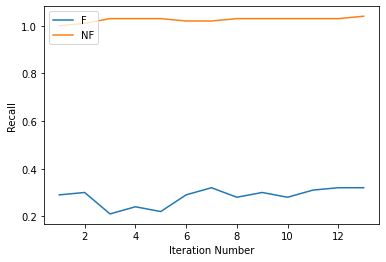

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,14,1).tolist()
#np.linspace(0,1,100).tolist()
#x.tolist()
#x = x.tolist()
for i in labels:
  plt.plot(x,fin_recall[i], label = i)

plt.legend(loc="upper left")
plt.xlabel("Iteration Number")
plt.ylabel("Recall")
plt.savefig("/content/2_label_rec.png", dpi=150)

plt.show()

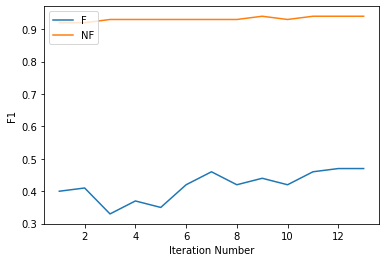

In [89]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,(len(met_fin[6])+1),1).tolist()
#np.linspace(0,1,100).tolist()
#x.tolist()
#x = x.tolist()
for i in labels:
  plt.plot(x,fin_F1[i], label = i)

plt.legend(loc="upper left")
plt.xlabel("Iteration Number")
plt.ylabel("F1")
plt.savefig("/content/2_label_f1.png", dpi=150)

plt.show()

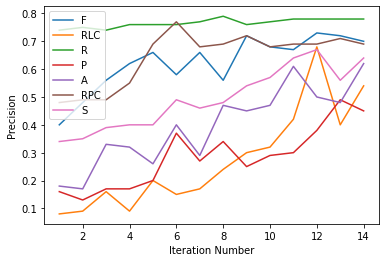

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,15,1).tolist()
#x = np.arange(1,14,1).tolist()

#np.linspace(0,1,100).tolist()
#x.tolist()
#x = x.tolist()
for i in labels:
  plt.plot(x,fin_precision[i], label = i)

plt.legend(loc="upper left")
plt.xlabel("Iteration Number")
plt.ylabel("Precision")
plt.savefig("/content/all_label_prec.png", dpi = 150)
plt.show()

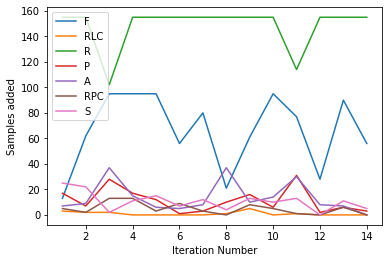

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,15,1).tolist()
#x = np.arange(1,14,1).tolist()

#np.linspace(0,1,100).tolist()
#x.tolist()
#x = x.tolist()
for i in labels:
  plt.plot(x,list_add[i], label = i)

plt.legend(loc="upper left")
plt.xlabel("Iteration Number")
plt.ylabel("Samples added")
plt.savefig("/content/all_label_itradd.png", dpi = 150)
plt.show()

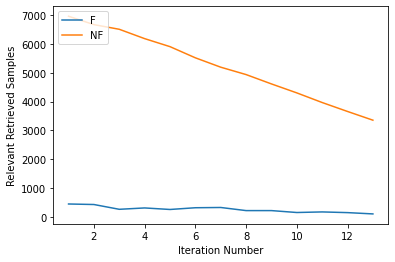

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#x = np.arange(1,15,1).tolist()
x = np.arange(1,14,1).tolist()

#np.linspace(0,1,100).tolist()
#x.tolist()
#x = x.tolist()
for i in labels:
  plt.plot(x,dict_rnum[i], label = i)

plt.legend(loc="upper left")
plt.xlabel("Iteration Number")
plt.ylabel("Relevant Retrieved Samples")
plt.savefig("/content/2_label_rnum.png", dpi = 150)
plt.show()

In [47]:
#how much training labels added.. and left unadded


#labels = ['F','RLC','R','P','A','RPC','S']                 #labels.. each element of type 'F'
#labsize = [47,7,77,31,18,6,14]                #proportionate size of each labels in total data 
#labsize = [94,14,154,62,36,12,28]                #proportionate size of each labels in total data 


#labels = ['F','NF']                 #labels.. each element of type 'F'
#labsize = [47,7,77,31,18,6,14]                #proportionate size of each labels in total data 
#labsize = [80,320]                #proportionate size of each labels in total data 

#Realised that bad seed means no sentences would be added for most of the labels in future itrs..
labsize_seed = [340,60,550,260,180,80,120]                #proportionate size of each labels in total data 
#labsize_seed = [200,799]                #proportionate size of each labels in total data 



In [48]:
import numpy as np
import pandas as pd

train_add = {}
size_test ={}
test_diff = {}
seed_size = {}
table = {}

ents = ['Seed_Size', 'Total_Samples_Added', 'Initial_Test_Samples', 'Final_Test_Samples']
for i in labels:
  seed_size[i] = labsize_seed[labels.index(i)]
  train_add[i] = sum(list_add[i])
  size_test[i] = len(df_pretrained1[df_pretrained1['label'] == i])
  test_diff[i] = size_test[i] - train_add[i]

#for j in ents:
temp1 = []
temp2 = []
temp3 = []
temp4 = []
for i in labels:
  temp1.append(seed_size[i])
  temp2.append(train_add[i])
  temp3.append(size_test[i])
  temp4.append(test_diff[i])

table[ents[0]] = temp1
table[ents[1]] = temp2
table[ents[2]] = temp3
table[ents[3]] = temp4
  

In [49]:
table

{'Final_Test_Samples': [815, 123, 3448, 607, 166, 56, 201],
 'Initial_Test_Samples': [1739, 137, 5524, 766, 359, 124, 351],
 'Seed_Size': [340, 60, 550, 260, 180, 80, 120],
 'Total_Samples_Added': [924, 14, 2076, 159, 193, 68, 150]}

In [50]:
pd.DataFrame.from_dict(table, orient='index',columns=labels)

,F,RLC,R,P,A,RPC,S
Seed_Size,340,60,550,260,180,80,120
Total_Samples_Added,924,14,2076,159,193,68,150
Initial_Test_Samples,1739,137,5524,766,359,124,351
Final_Test_Samples,815,123,3448,607,166,56,201


TypeError: ignored

In [17]:
labels

['F', 'NF']